<center>
    <img src="https://github.com/sinaaghaee/ProcessMiningProject-CustomerBehaviorAnalysis/blob/main/Images/Sharif_Logo.png?raw=true" width="250"   />
</center>

# Data-Driven Decison-Making Project - Rainfall Prediction

 ## Course Info:
 
 **Student/Analyst:**  Sina Aghaee <br>
 **Course:** Data-Driven Decison-Making 1399-1400 <br>
 **Institution:** Sharif University of Technology, Department of Industrial Engineering <br>
 **Instructor:**  Dr. Nafiseh Sedghi 


## Introduction
 
 
In this notebook, first, I will predict if it rains on a particular day or not in one of the Australian provinces, and then I will try to predict the amount of rainfall.

I will use use **R** language and **Rain in Australia dataset** for my analysis.

The dataset used in this project contains information that helps predict rainfall in the Australian provinces. This dataset contains 145,460 observations and 23 attributes.

You can find more information and a complete description of the dataset and its attributes in this [link](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package).



In [1]:
# Turning off the warnings
options(warn=-1)

# Changing the default size of the plots we are going to draw
options(repr.plot.width=15, repr.plot.height=8)

# Importing required libraries
library(ggplot2)
library(naniar)
library(plyr)
library(rpart)
library(rpart.plot)
library(caret)
library(e1071)
library(lattice)
library(randomForest)

Loading required package: lattice

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




# 1. Exploratory Data Analysis (EDA)

In [2]:
# Reading the dataset and checking the its structure
weather <- read.csv('weatherAUS.csv')
str(weather)

'data.frame':	145460 obs. of  23 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007

The data type of the data is character, so we need to convert it to date format:

In [3]:
# Converting the datatype of Date from chr to Date
weather$Date <- as.Date(weather$Date)
str(weather)

'data.frame':	145460 obs. of  23 variables:
 $ Date         : Date, format: "2008-12-01" "2008-12-02" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009 1013 1

Let's check the summary of our data:

In [4]:
summary(weather)

      Date              Location            MinTemp         MaxTemp     
 Min.   :2007-11-01   Length:145460      Min.   :-8.50   Min.   :-4.80  
 1st Qu.:2011-01-11   Class :character   1st Qu.: 7.60   1st Qu.:17.90  
 Median :2013-06-02   Mode  :character   Median :12.00   Median :22.60  
 Mean   :2013-04-04                      Mean   :12.19   Mean   :23.22  
 3rd Qu.:2015-06-14                      3rd Qu.:16.90   3rd Qu.:28.20  
 Max.   :2017-06-25                      Max.   :33.90   Max.   :48.10  
                                         NA's   :1485    NA's   :1261   
    Rainfall        Evaporation        Sunshine     WindGustDir       
 Min.   :  0.000   Min.   :  0.00   Min.   : 0.00   Length:145460     
 1st Qu.:  0.000   1st Qu.:  2.60   1st Qu.: 4.80   Class :character  
 Median :  0.000   Median :  4.80   Median : 8.40   Mode  :character  
 Mean   :  2.361   Mean   :  5.47   Mean   : 7.61                     
 3rd Qu.:  0.800   3rd Qu.:  7.40   3rd Qu.:10.60            

Let's check the status of the missing values for all the variables in the whole dataset:

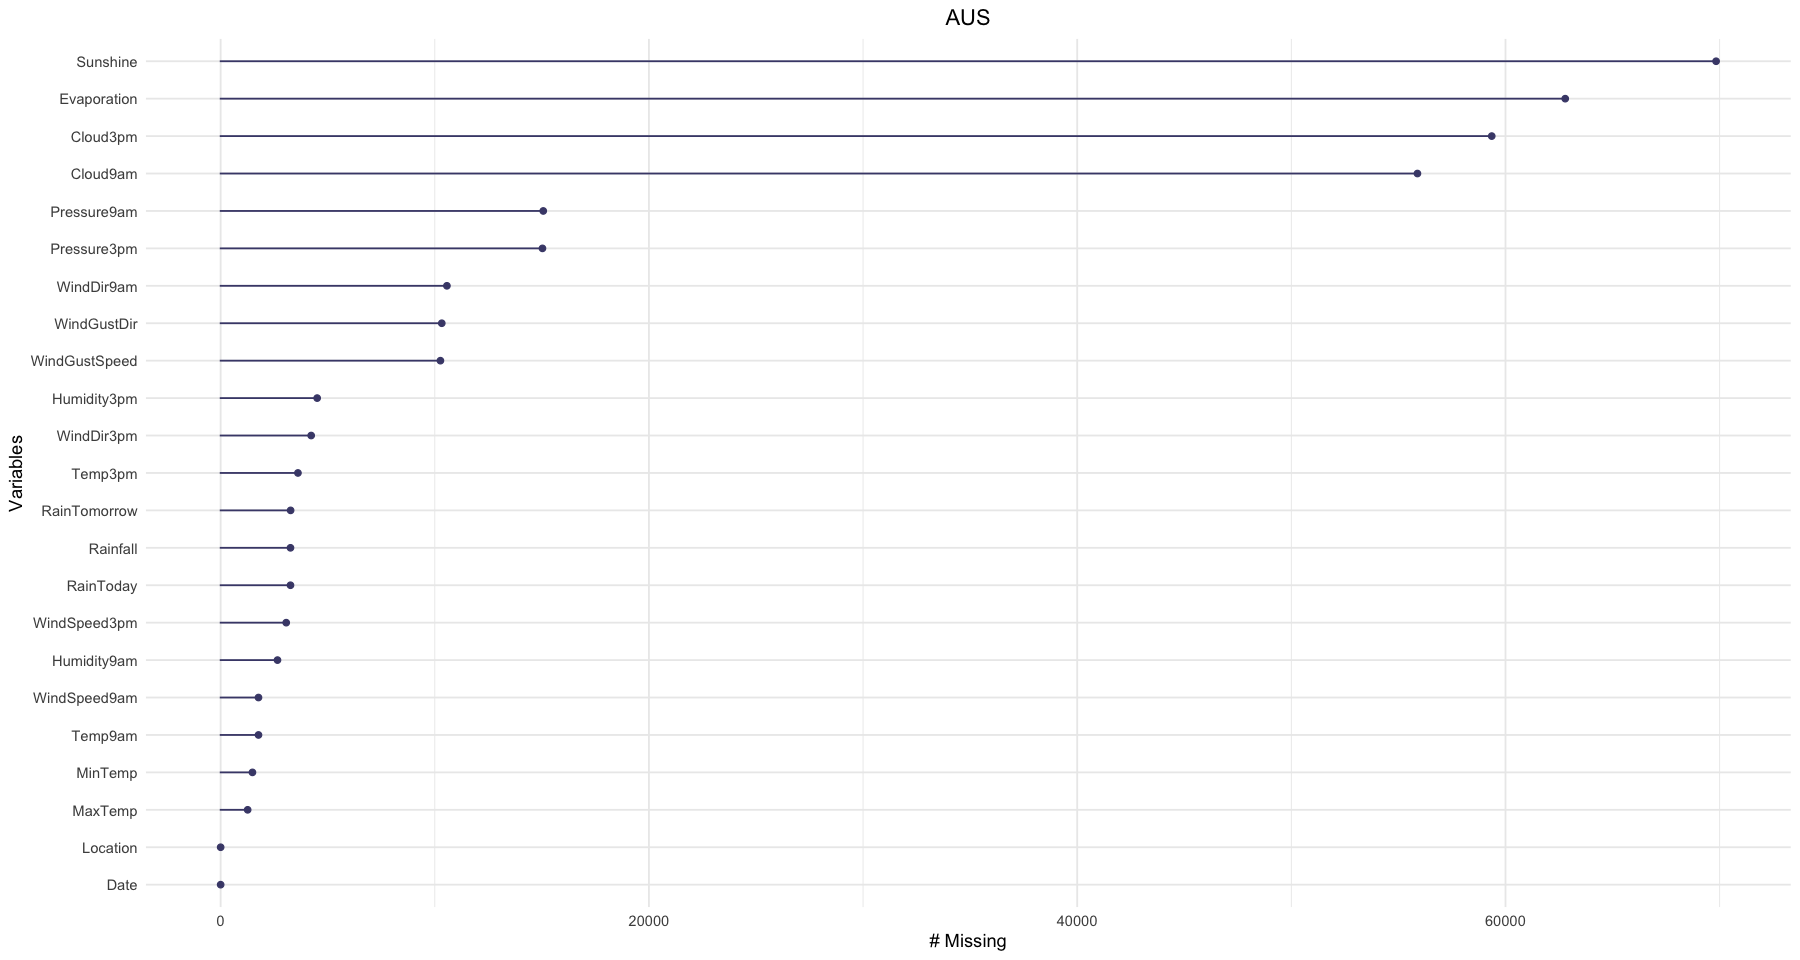

In [5]:
gg_miss_var(weather) + ggtitle("AUS")+ theme(plot.title = element_text(hjust =0.5))

Now let's check which provinces of Australia have the most significant number of observations:

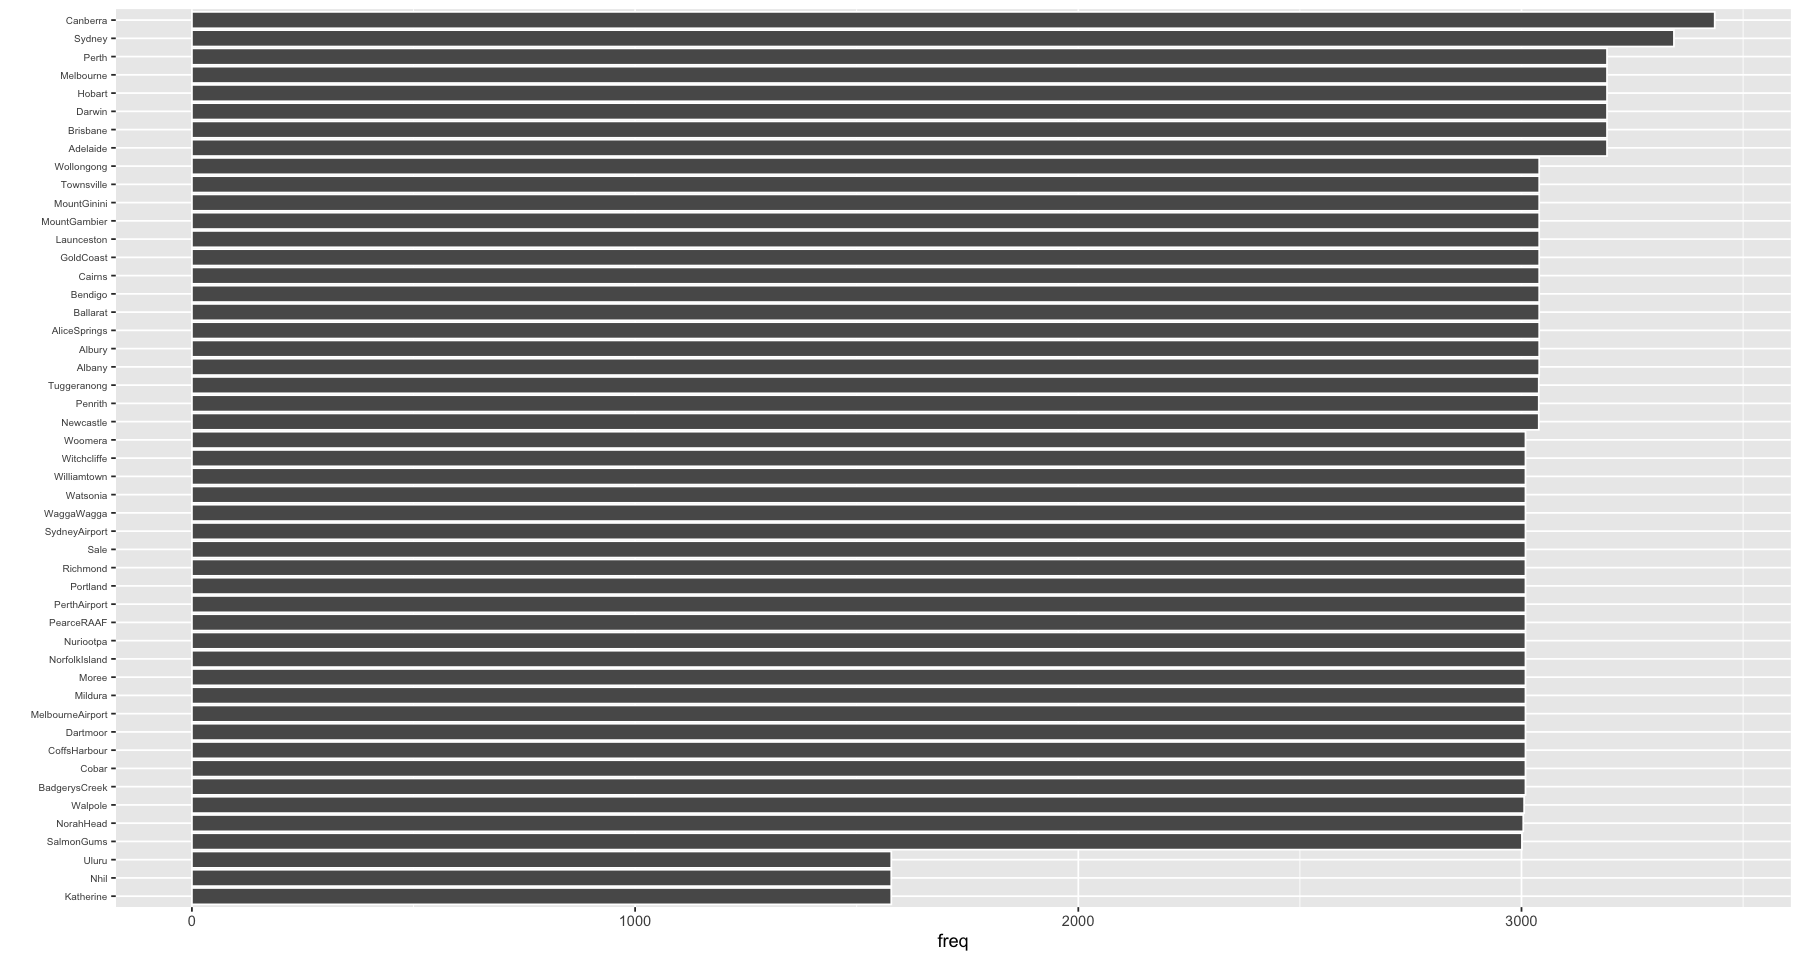

In [6]:
location_count <- count(weather, vars = "Location")
location_count$Location <- reorder(location_count$Location, location_count$freq)
ggplot(data= location_count, aes(x=freq , y= Location)) + geom_bar(stat="identity", color="white") + theme(axis.text.y = element_text(size=6)) + ylab("")


In the initial dataset, the most considerable amount of available data is related to Canberra, but the critical point here is that this number also includes NA data; So, after handling the NA data, we plot the above chart again.

Since we have a large number of observations, we drop the rows containing NA values:

In [7]:
# convert the type of chr variables to factor
weather$RainTomorrow <- as.factor(weather$RainTomorrow)
weather$RainToday <- as.factor(weather$RainToday)
weather$Location <- as.factor(weather$Location)
weather$WindGustDir <- as.factor(weather$WindGustDir)
weather$WindDir9am <- as.factor(weather$WindDir9am)
weather$WindDir3pm <- as.factor(weather$WindDir3pm)

# dropping rows with NA values
weather1 <- na.omit(weather)

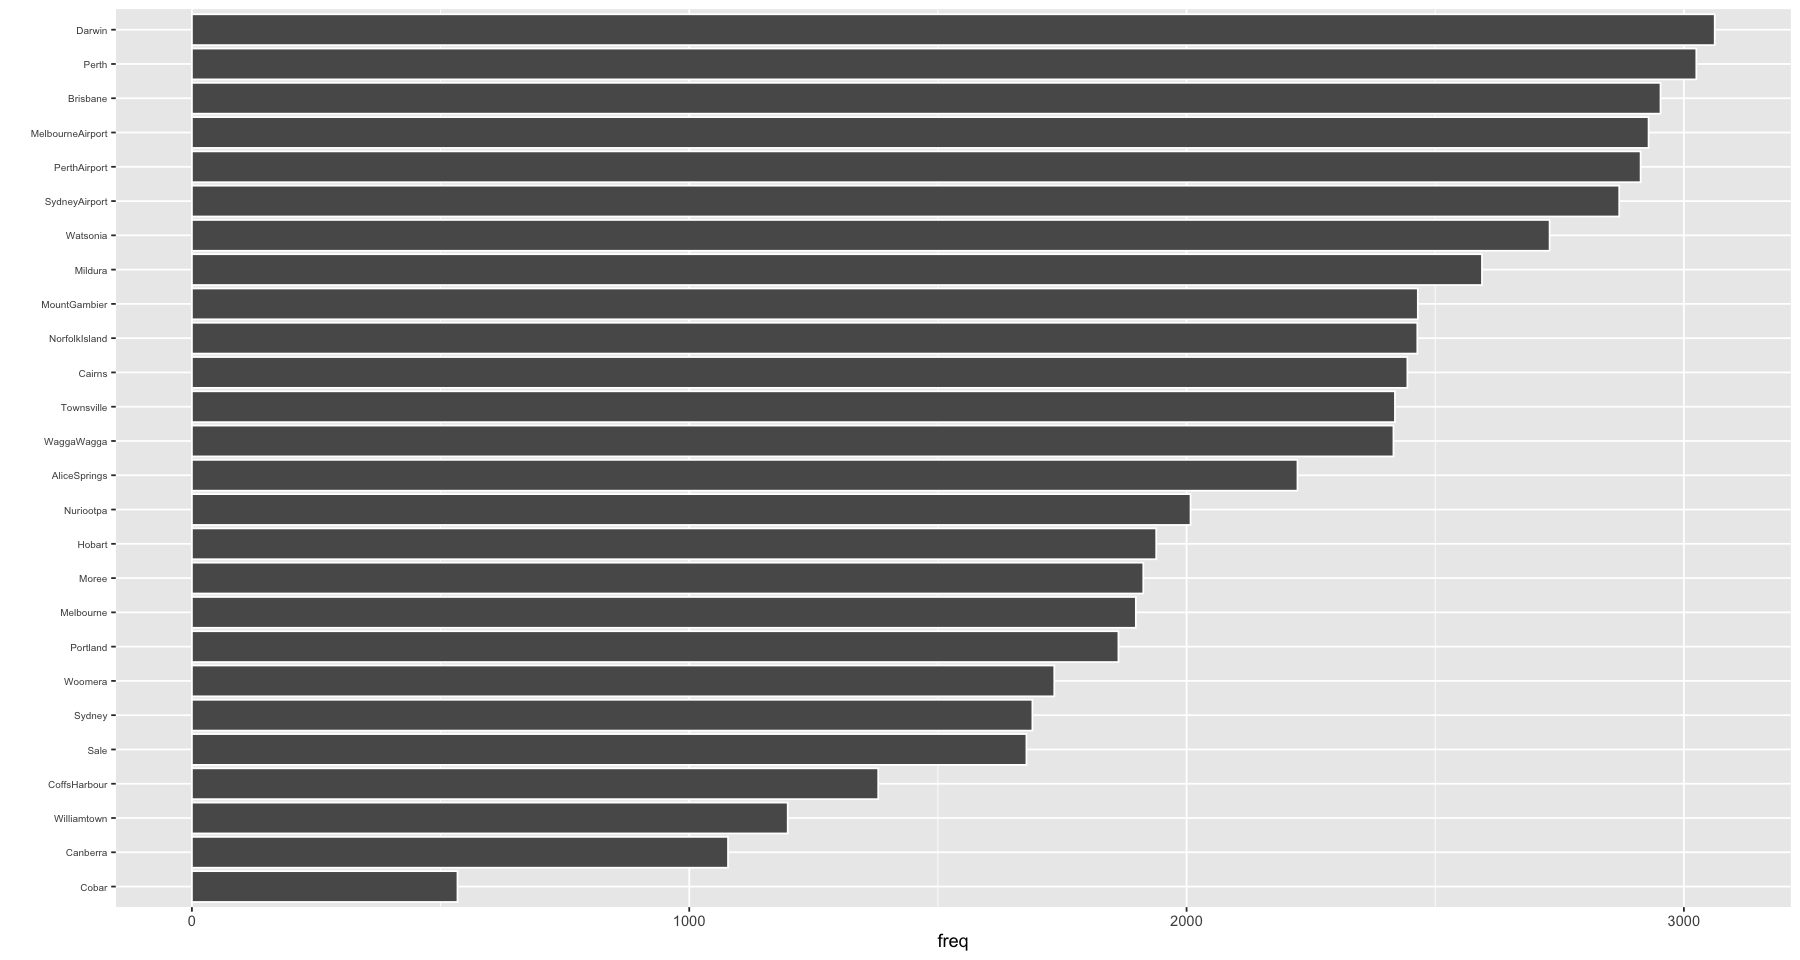

In [8]:
location_count1 <- count(weather1, vars = "Location")
location_count1$Location <- reorder(location_count1$Location, location_count1$freq)
ggplot(data= location_count1, aes(x=freq , y= Location)) + geom_bar(stat="identity", color="white") + theme(axis.text.y = element_text(size=6)) + ylab("")


After dropping rows with NA values, the most significant number of observations belong to Darwin and Perth Provinces.

I choose the Perth province for further analysis, and I will predict next day rain situation for this province:

First, let's check out the status of the missing values for the Perth Province:

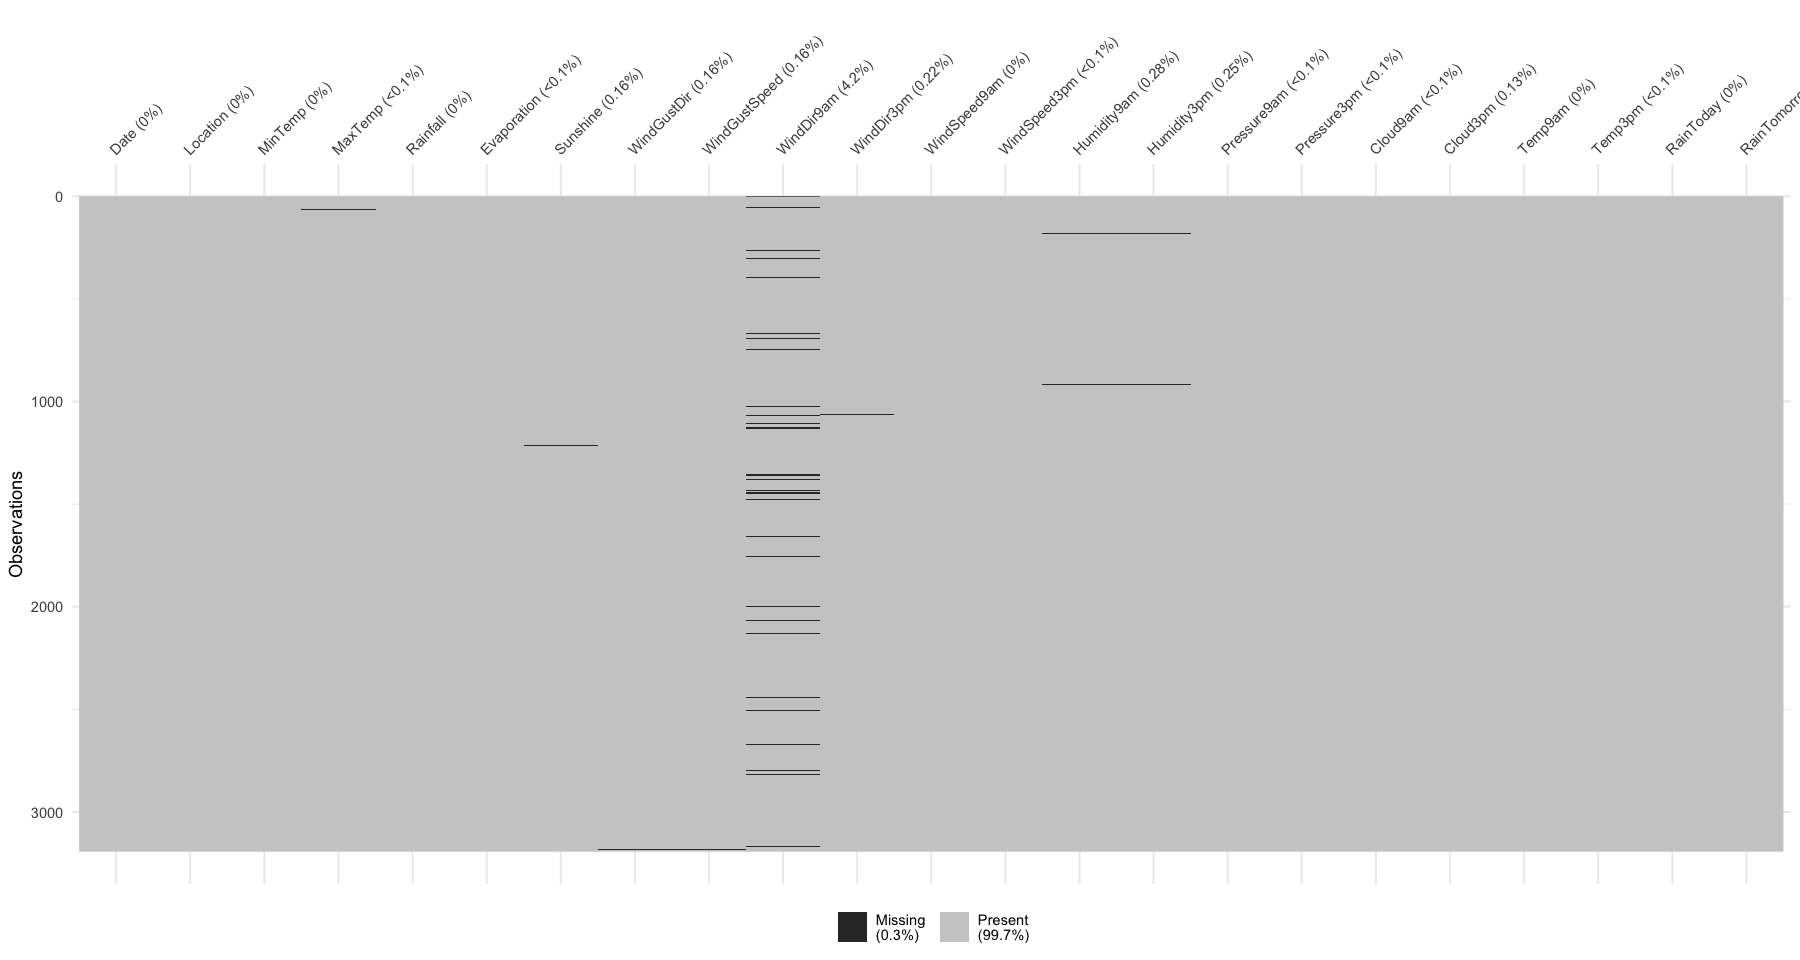

In [9]:
perth_withNA <- subset(weather, weather$Location == "Perth")
vis_miss(perth_withNA)

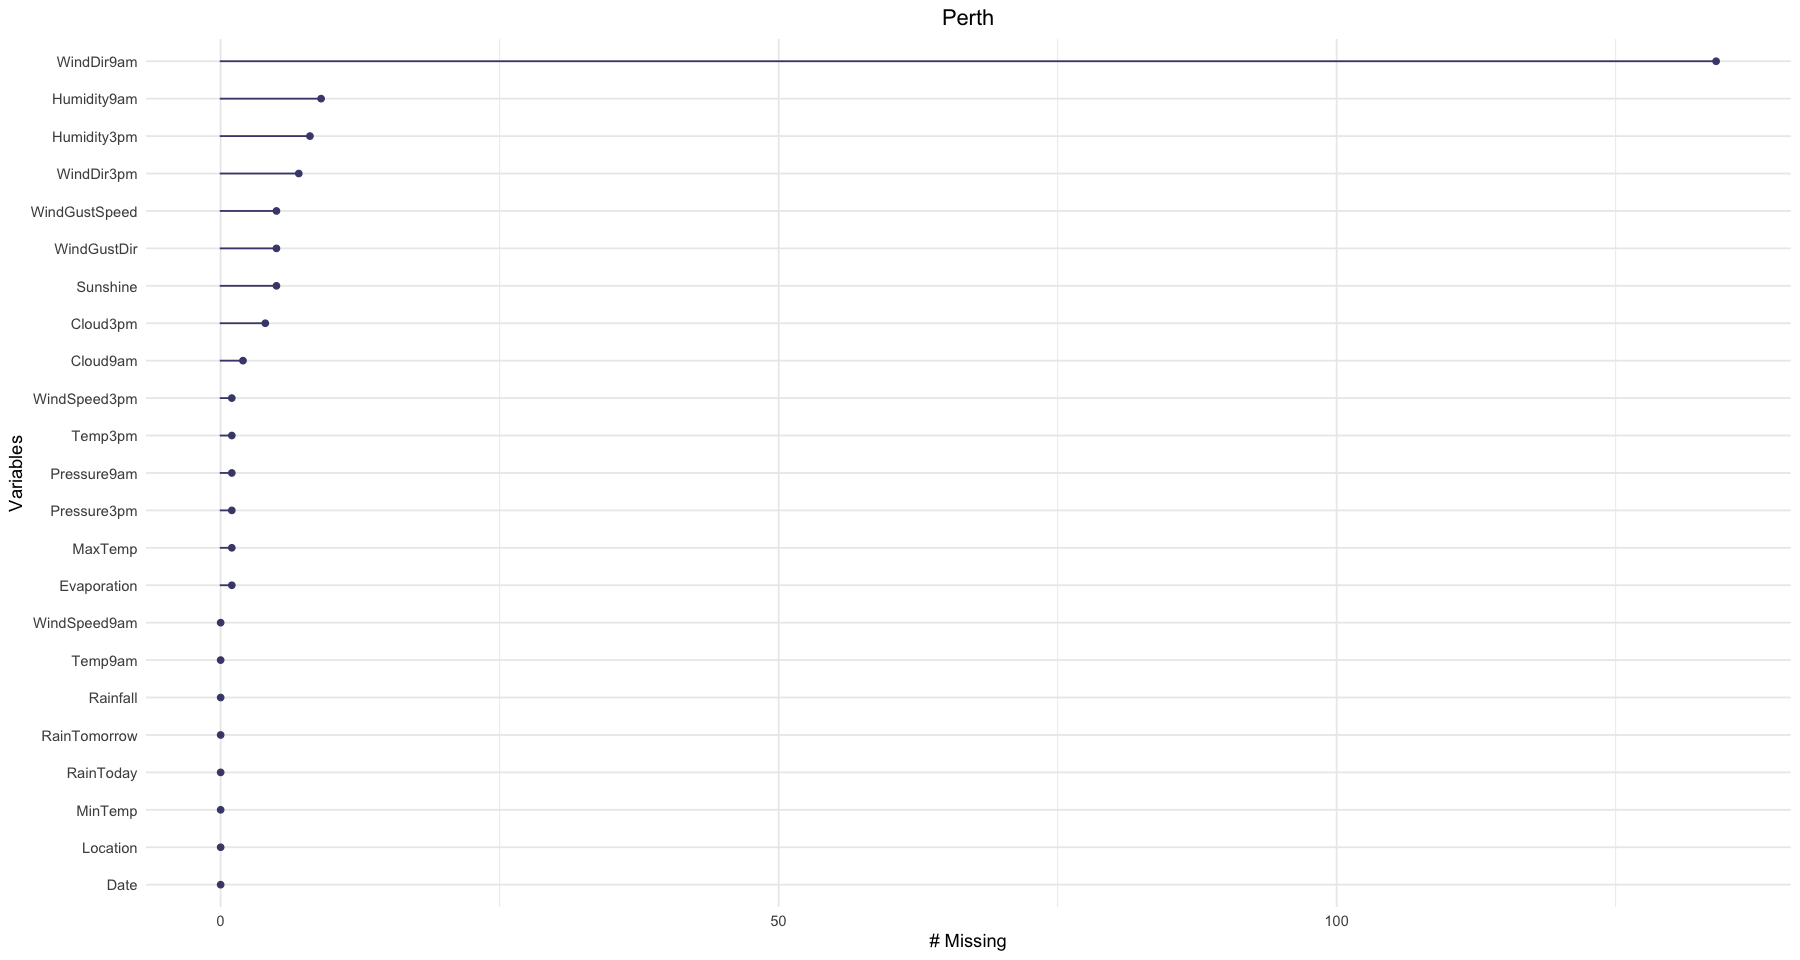

In [10]:
gg_miss_var(perth_withNA) + ggtitle("Perth")+ theme(plot.title = element_text(hjust =0.5))

As we see in the above figures, only 0.3 percent of the data is missing, and the variable with the highest rate of missing values is wind direction at 9 am with 4.2 percent of missing values. It seems that if we drop the rows with missing values, we would still have enough data for prediction, so instead of imputation the missing values, I decided to drop the observations with missing values.

In [11]:
# dropping rows with NA values
perth <- na.omit(perth_withNA)

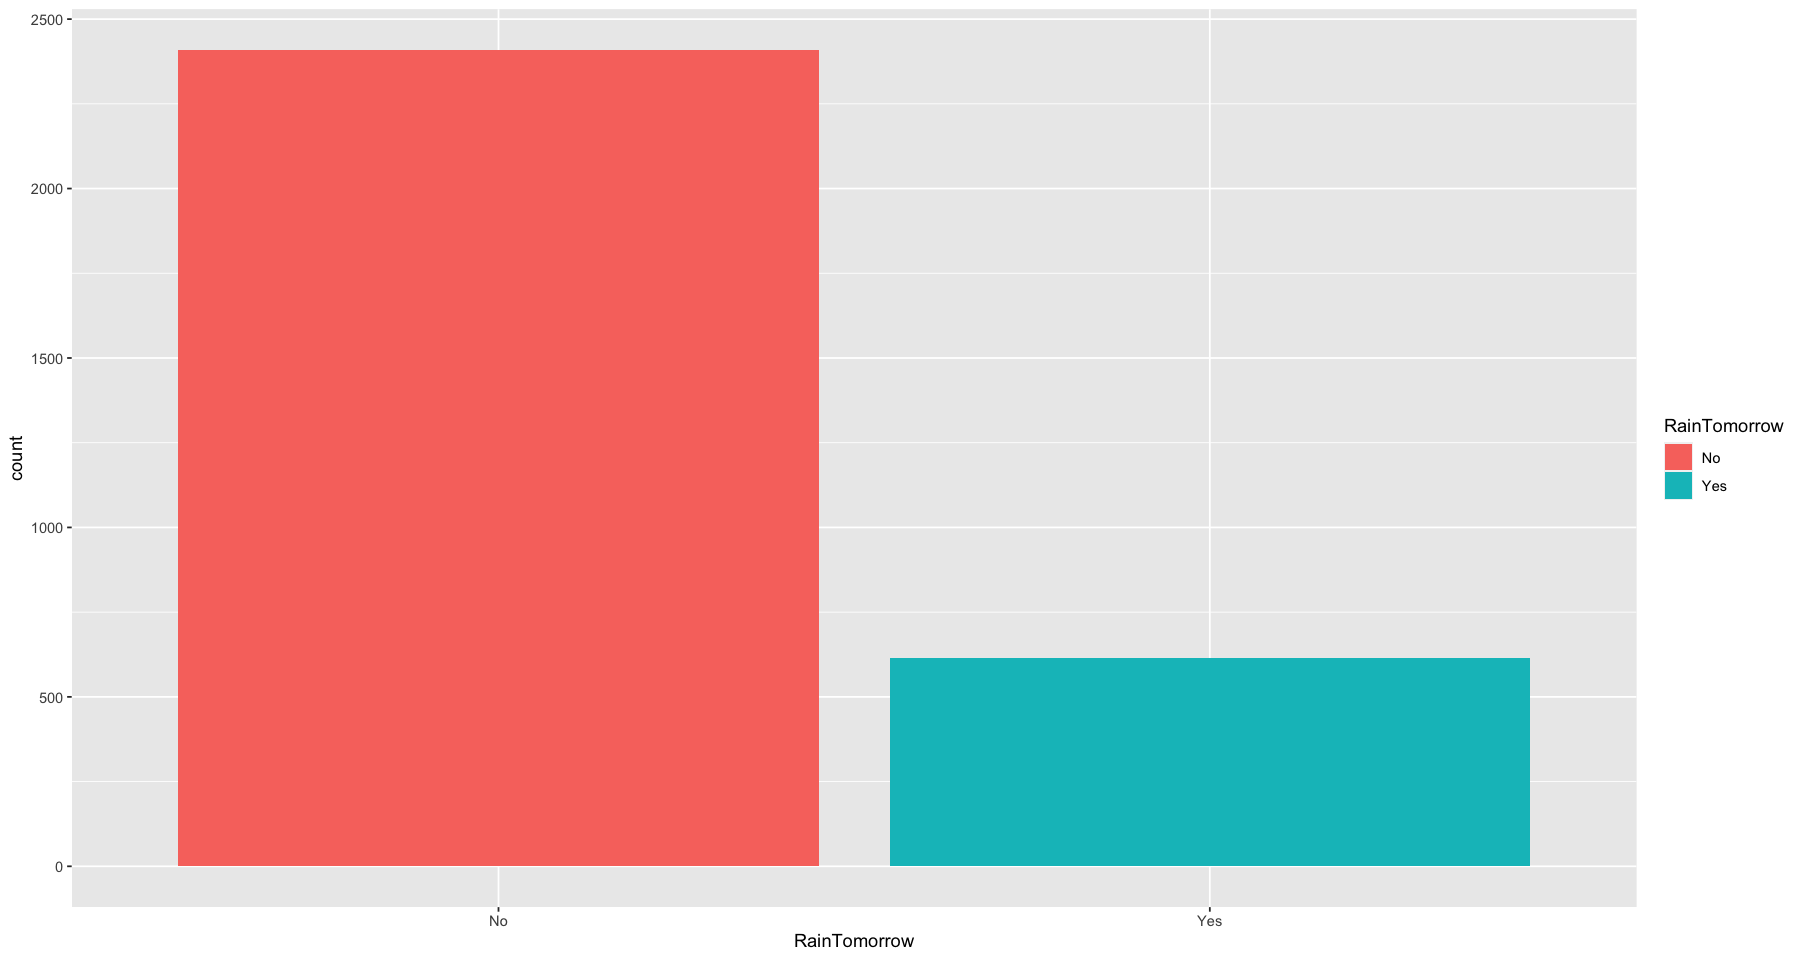

In [12]:
ggplot(perth, aes(x= RainTomorrow , fill = RainTomorrow )) + geom_histogram(stat="count")

The above figures show that it rains in Perth 20 percent of the time.

In [13]:
table(perth$RainTomorrow)


  No  Yes 
2409  616 

We have 616 observations of the days that rains and 2409 observations of days that it doesn't rain.

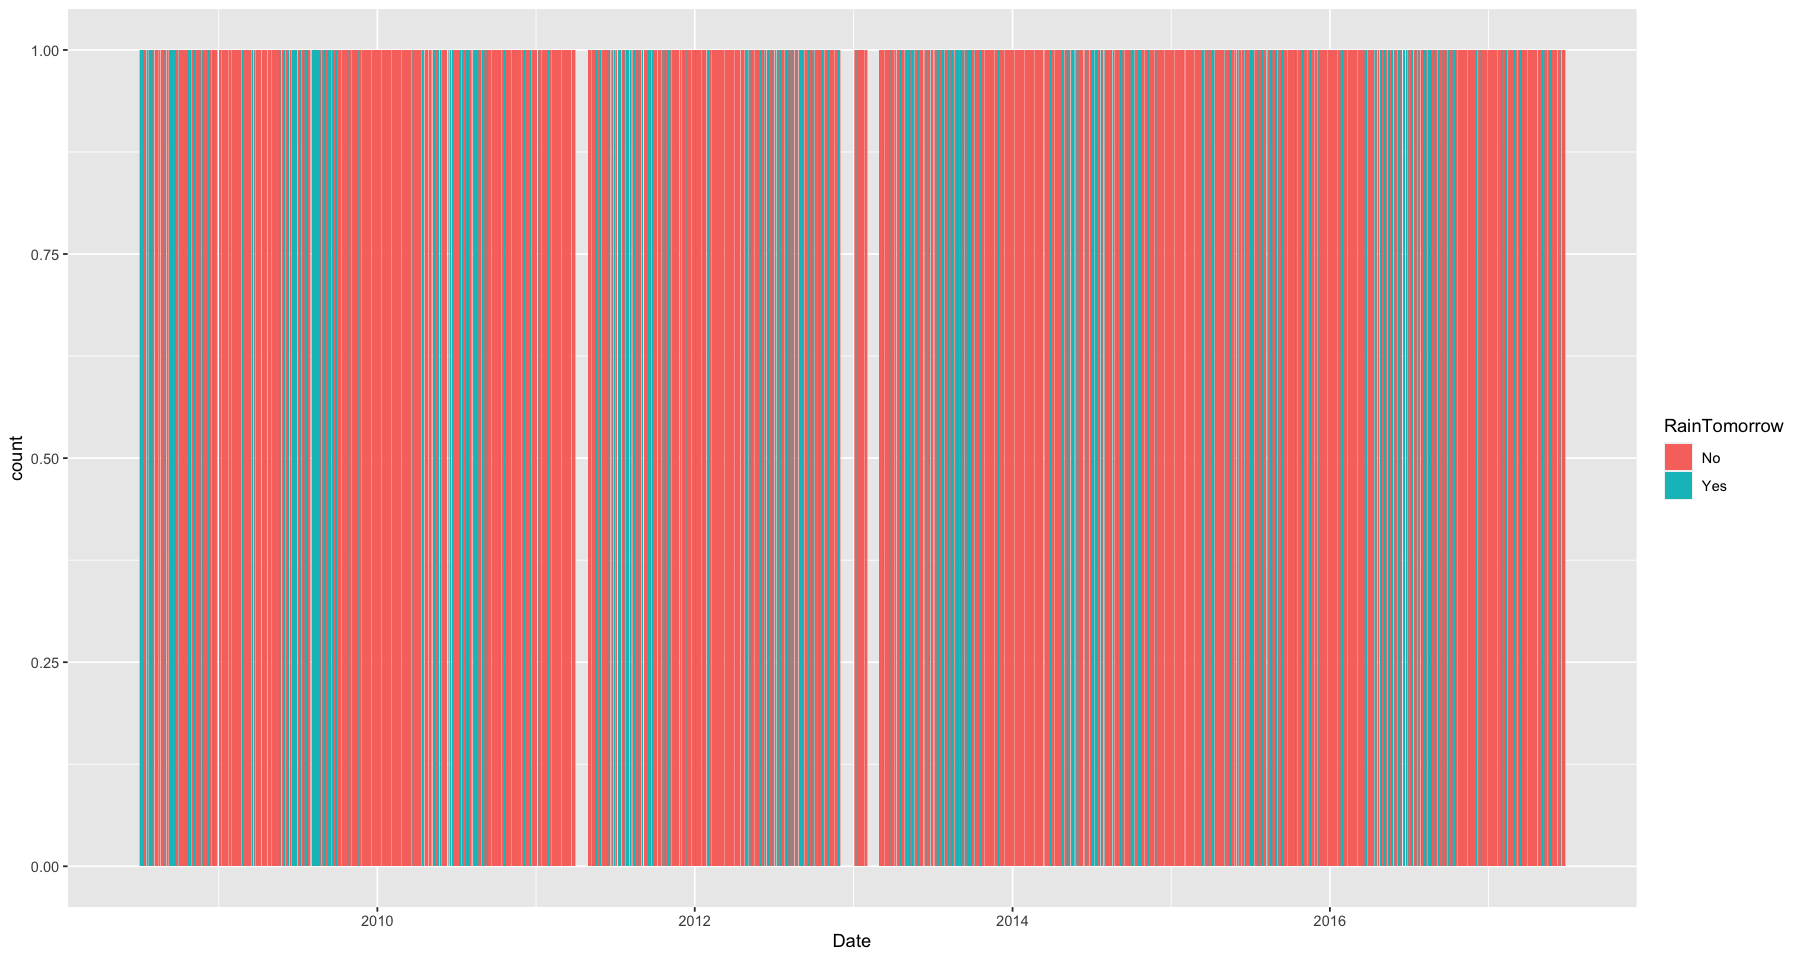

In [14]:
ggplot(perth, aes(x= Date , fill = RainTomorrow )) + geom_histogram(stat="count")

The distribution of raining days in Perth province is observable in the above figure. We also can see that it seems to rain more at certain times of the year.

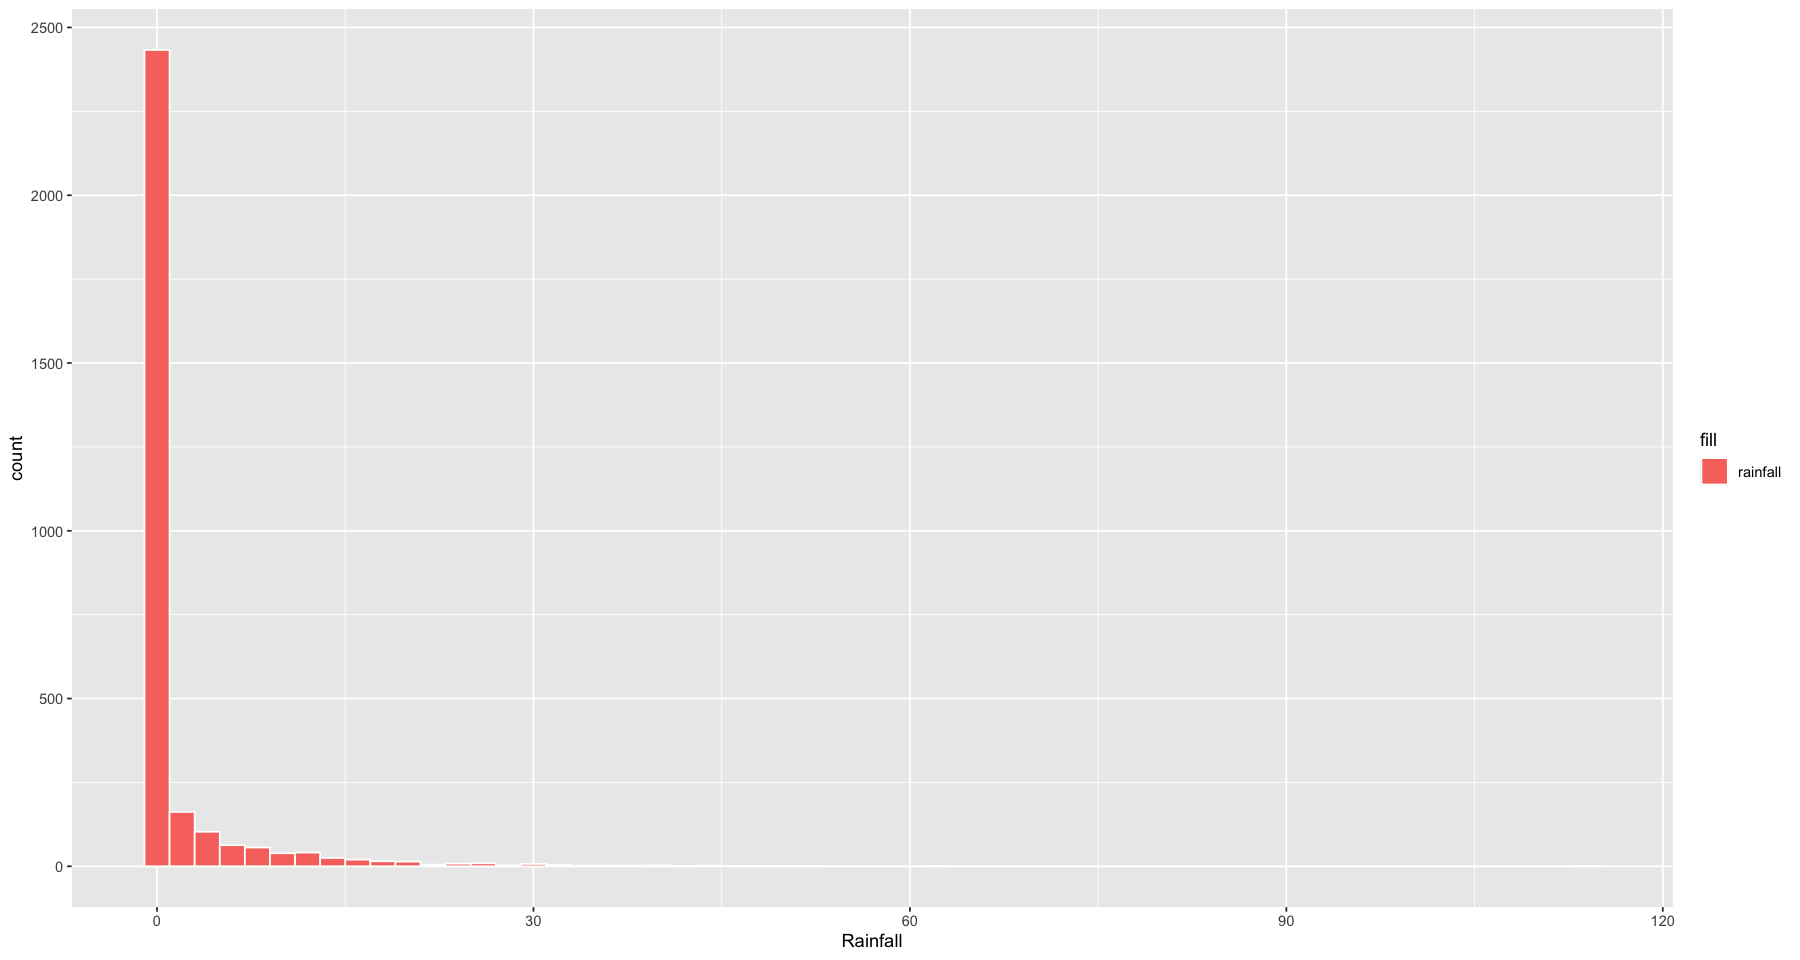

In [15]:
ggplot(perth, aes(x= Rainfall, fill = "rainfall") ) + geom_histogram( binwidth = 2, color= "white") 

The above figure shows the distribution of Rainfall (amount of rain) in Perth, which is zero most of the time (80%), as I mentioned earlier.

The Perth data I used in this study has no outlier, and only one observation, the one for  February 10, 2014, which has 114 mm of rainfall, has the most distance from the rest of the data points, and other data points are in the range of zero to 50 mm. 

# 2. Raining Prediction

In this section, I'm going to predict if it rains or not on a particular day based on the data we have from the before.

## Model Fitting


In [16]:
## Splitting Dataset into Train and Test sets (80 percent for training and 20 percent for testing)
library(caTools)
set.seed(1000)
split <- sample.split(perth$RainTomorrow, SplitRatio = 0.8)
ClTrain <- subset(perth, split==T,select = -c(Location))
ClTest <- subset(perth, split==F,select = -c(Location))

To evaluate the models I later create for prediction, first, I need to create a baseline model. The baseline model I make is if it rains today, then I predict that it rains tomorrow, and if it does not rain today, I expect it won't rain tomorrow.

In [17]:
## Baseline Model
Baseline <- table(ClTest$RainTomorrow, ClTest$RainToday)
Baseline

     
       No Yes
  No  424  58
  Yes  62  61

In [18]:
sum(diag(Baseline))/nrow(ClTest)

[1] 0.8016529

My baseline model has 80 percent accuracy, so if I can create models that predict rain with higher accuracy, they would be good models.

## Logistic Regression

I used the Backward Selection method to select the influential variables for the Logistic Regression model. First, I used all the variables in the model. Considering the P-Value values, the correlations between the variables, and the AIC index, I removed the less essential variables from the model.

### Feature Selection for LR Model

In [19]:
## Moedeling with all variable except Date 
logmod <- glm(RainTomorrow ~. -Date , data= ClTrain, family = binomial)
summary(logmod)


Call:
glm(formula = RainTomorrow ~ . - Date, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0834  -0.3082  -0.1371  -0.0549   3.3025  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    200.030226  24.492982   8.167 3.17e-16 ***
MinTemp         -0.076823   0.053249  -1.443 0.149104    
MaxTemp          0.093565   0.089090   1.050 0.293609    
Rainfall         0.006958   0.017803   0.391 0.695927    
Evaporation     -0.003478   0.051379  -0.068 0.946034    
Sunshine        -0.234902   0.046930  -5.005 5.58e-07 ***
WindGustDirENE  -0.965990   0.718905  -1.344 0.179047    
WindGustDirESE  -0.092908   0.695693  -0.134 0.893761    
WindGustDirN    -0.069474   0.720858  -0.096 0.923221    
WindGustDirNE   -0.371626   0.605673  -0.614 0.539496    
WindGustDirNNE   0.102007   0.660313   0.154 0.877229    
WindGustDirNNW   0.254240   0.770583   0.330 0.741452    
WindGustDirNW    0.067752   0.659952

Now I drop the non-significant variables from the model 0:

In [20]:
logmod1 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am   , data= ClTrain, family = binomial)
summary(logmod1)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9461  -0.3209  -0.1574  -0.0611   3.2378  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   200.615380  23.611823   8.496  < 2e-16 ***
MinTemp        -0.113003   0.049326  -2.291 0.021968 *  
MaxTemp         0.088855   0.082549   1.076 0.281749    
Rainfall        0.004968   0.017413   0.285 0.775431    
Evaporation    -0.023192   0.049737  -0.466 0.641006    
Sunshine       -0.252487   0.044804  -5.635 1.75e-08 ***
WindGustSpeed   0.069424   0.013011   5.336 9.51e-08 ***
WindDir3pmENE   1.281020   0.764850   1.675 0.093961 .  
WindDir3pmESE   1.160746   0.816750   1.421 0.155265    
WindDir3pmN     2.325248   0.784299   2.965 0.003029 ** 
WindDir3pmNE    1.194277   0.807015   1.480 0.138908    
WindDir3pmNNE   1.728538   0.813338   2.125 0.033567 *  
Wi

Now I drop the non-significant variables from the model 1:

In [21]:
logmod2 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm   , data= ClTrain, family = binomial)
summary(logmod2)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9017  -0.3784  -0.1877  -0.0702   3.2965  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   235.211648  21.856854  10.761  < 2e-16 ***
MinTemp        -0.166411   0.045624  -3.647 0.000265 ***
MaxTemp         0.099885   0.078070   1.279 0.200747    
Rainfall       -0.008262   0.015409  -0.536 0.591831    
Evaporation    -0.126186   0.045360  -2.782 0.005404 ** 
Sunshine       -0.238270   0.041222  -5.780 7.47e-09 ***
WindGustSpeed   0.078597   0.012053   6.521 6.99e-11 ***
WindSpeed3pm   -0.013024   0.021774  -0.598 0.549744    
Humidity9am     0.004205   0.008935   0.471 0.637925    
Humidity3pm     0.053636   0.010576   5.072 3.94e-07 ***
Pressure9am     0.292978   0.061784   4.742 2.12e-06 ***
Pressure3pm    -0.527926   0.063428  -8.323  <

It seems reasonable that temperature parameters in a day have correlations, and I probably won't need all the temperature parameters in my model because I want to avoid multicollinearity. So let's check the correlations between temperature parameters:

,MinTemp,Temp9am,MaxTemp,Temp3pm
MinTemp,1.0000000,0.8557934,0.7179862,0.6735978
Temp9am,0.8557934,1.0000000,0.8999983,0.8430766
MaxTemp,0.7179862,0.8999983,1.0000000,0.9770428
Temp3pm,0.6735978,0.8430766,0.9770428,1.0000000


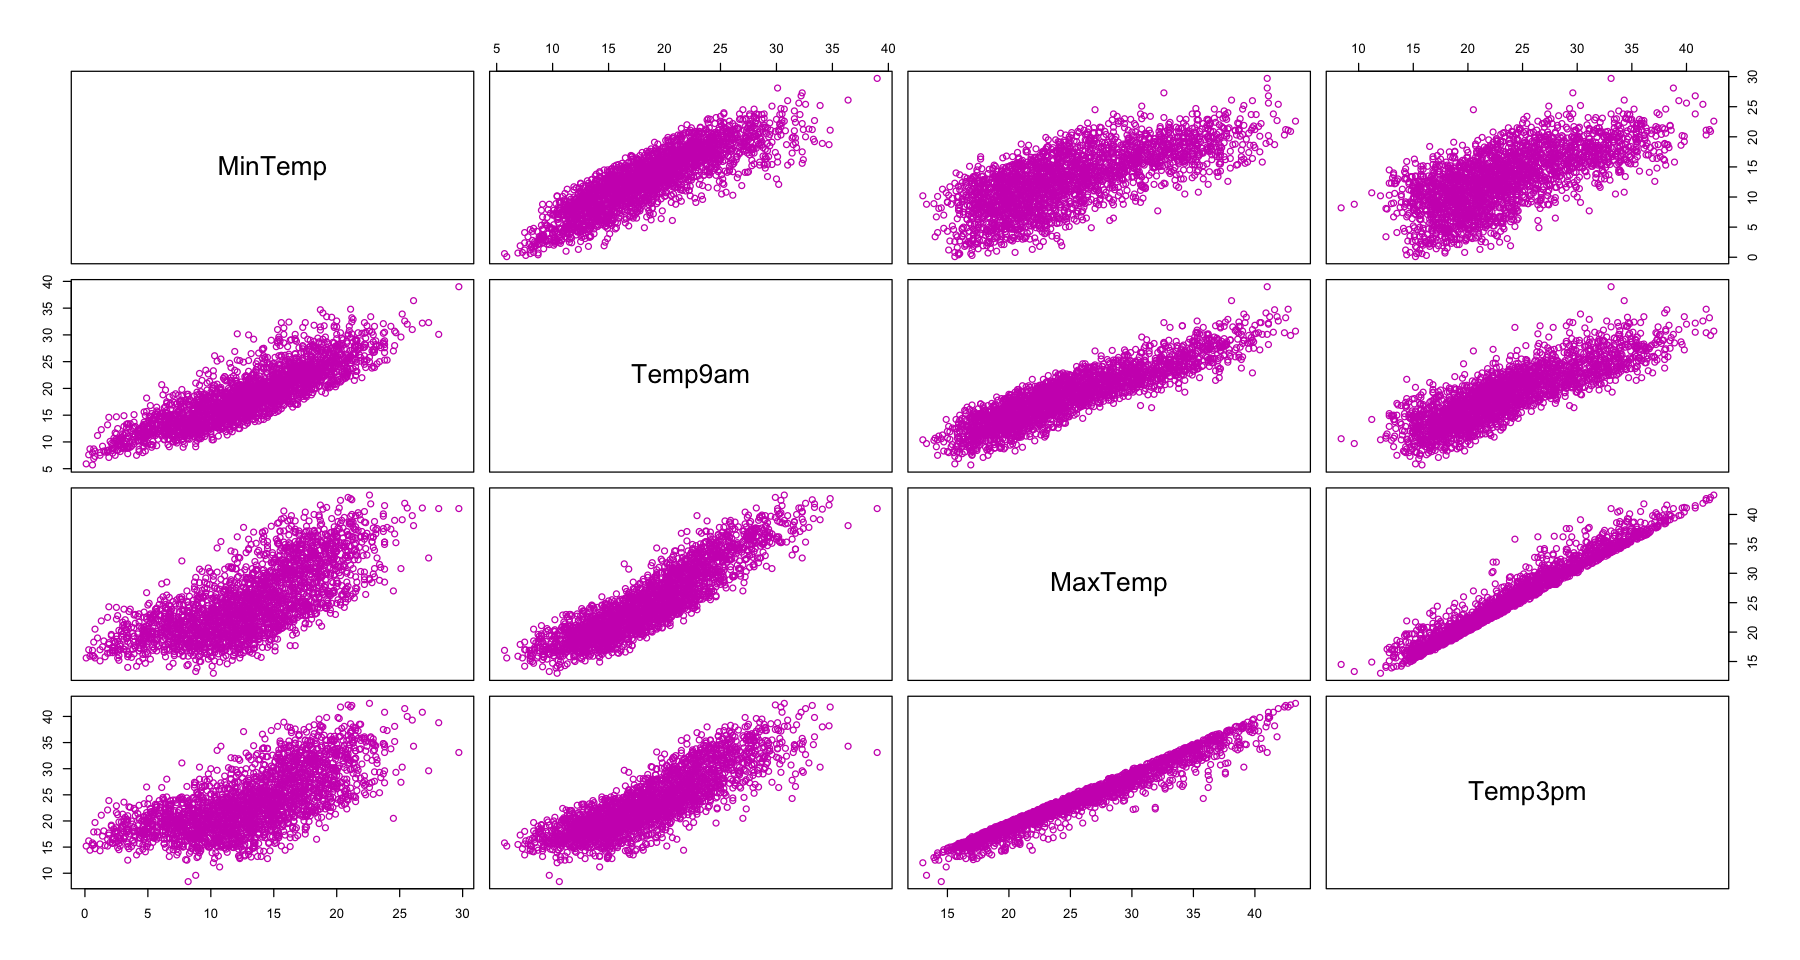

In [22]:
cor(ClTrain[,c("MinTemp","Temp9am","MaxTemp","Temp3pm")])
pairs(ClTrain[,c("MinTemp","Temp9am","MaxTemp","Temp3pm")], col = 14)

There is an obvious correlation, So I decided only to use min temp in my model, and I dropped the other ones from the last model:

In [23]:
logmod3 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am, data= ClTrain, family = binomial)
summary(logmod3)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9826  -0.3775  -0.1897  -0.0700   3.2592  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   232.100022  20.974040  11.066  < 2e-16 ***
MinTemp        -0.189558   0.026303  -7.207 5.73e-13 ***
Rainfall       -0.007486   0.015479  -0.484  0.62866    
Evaporation    -0.117462   0.044245  -2.655  0.00793 ** 
Sunshine       -0.242698   0.035011  -6.932 4.15e-12 ***
WindGustSpeed   0.080682   0.011792   6.842 7.79e-12 ***
WindSpeed3pm   -0.010810   0.021292  -0.508  0.61166    
Humidity9am     0.003099   0.006978   0.444  0.65693    
Humidity3pm     0.060204   0.007668   7.852 4.10e-15 ***
Pressure9am     0.287511   0.055969   5.137 2.79e-07 ***
Pressure3pm    -0.519991   0.057054  -9.114  < 2e-16 ***


Now let's remove the non-significant variables from model 3:

In [24]:
logmod4 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am - Rainfall - Humidity9am  - WindSpeed3pm, data= ClTrain, family = binomial)
summary(logmod4)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Rainfall - Humidity9am - WindSpeed3pm, family = binomial, 
    data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9820  -0.3759  -0.1888  -0.0706   3.2477  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   230.502776  20.784917  11.090  < 2e-16 ***
MinTemp        -0.189428   0.026258  -7.214 5.43e-13 ***
Evaporation    -0.121880   0.042950  -2.838 0.004543 ** 
Sunshine       -0.248573   0.033616  -7.394 1.42e-13 ***
WindGustSpeed   0.076235   0.009526   8.002 1.22e-15 ***
Humidity3pm     0.061262   0.007236   8.467  < 2e-16 ***
Pressure9am     0.295139   0.054974   5.369 7.93e-08 ***
Pressure3pm    -0.525856   0.056461  -9.314  < 2e-16 ***
Cloud3pm        0.095679   0.043014   2.224 0.026122 *  
RainTodayYes    0.703373   0.200218   3.513 0.000443 ***
---
Signif. 

All variables seems significant in model4:

,Pressure3pm,Pressure9am
Pressure3pm,1.0000000,0.9622503
Pressure9am,0.9622503,1.0000000


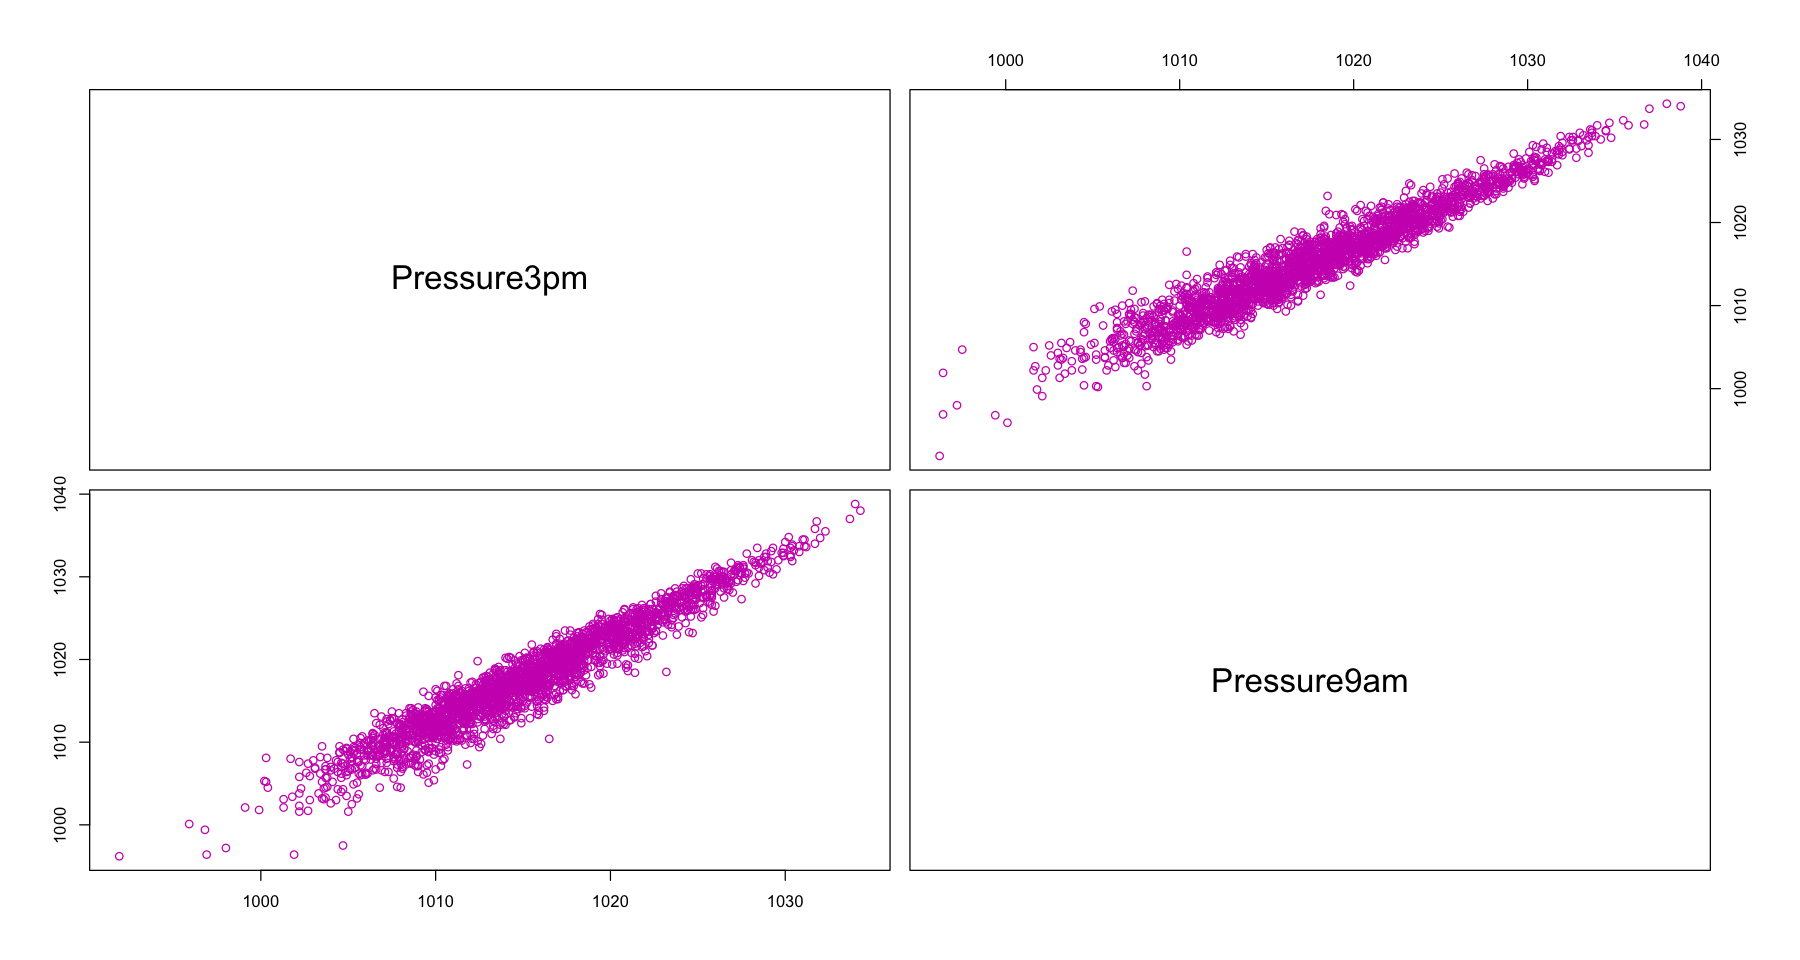

In [25]:
cor(ClTrain[,c("Pressure3pm","Pressure9am")])
pairs(ClTrain[,c("Pressure3pm","Pressure9am")], col = 14)

As you see in the above figures, pressure parameters are correlated too.

Here is the Final Logistic Model for rain prediction:

In [26]:
## Fitting logistic regression model
logmod4 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am - Rainfall - Humidity9am   - WindSpeed3pm  , data= ClTrain, family = binomial)
summary(logmod4)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Rainfall - Humidity9am - WindSpeed3pm, family = binomial, 
    data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9820  -0.3759  -0.1888  -0.0706   3.2477  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   230.502776  20.784917  11.090  < 2e-16 ***
MinTemp        -0.189428   0.026258  -7.214 5.43e-13 ***
Evaporation    -0.121880   0.042950  -2.838 0.004543 ** 
Sunshine       -0.248573   0.033616  -7.394 1.42e-13 ***
WindGustSpeed   0.076235   0.009526   8.002 1.22e-15 ***
Humidity3pm     0.061262   0.007236   8.467  < 2e-16 ***
Pressure9am     0.295139   0.054974   5.369 7.93e-08 ***
Pressure3pm    -0.525856   0.056461  -9.314  < 2e-16 ***
Cloud3pm        0.095679   0.043014   2.224 0.026122 *  
RainTodayYes    0.703373   0.200218   3.513 0.000443 ***
---
Signif. 

Let's predict rain for test data based on lomgmod4 model we created above:

In [27]:
predicTrain <- predict(logmod4, type="response")

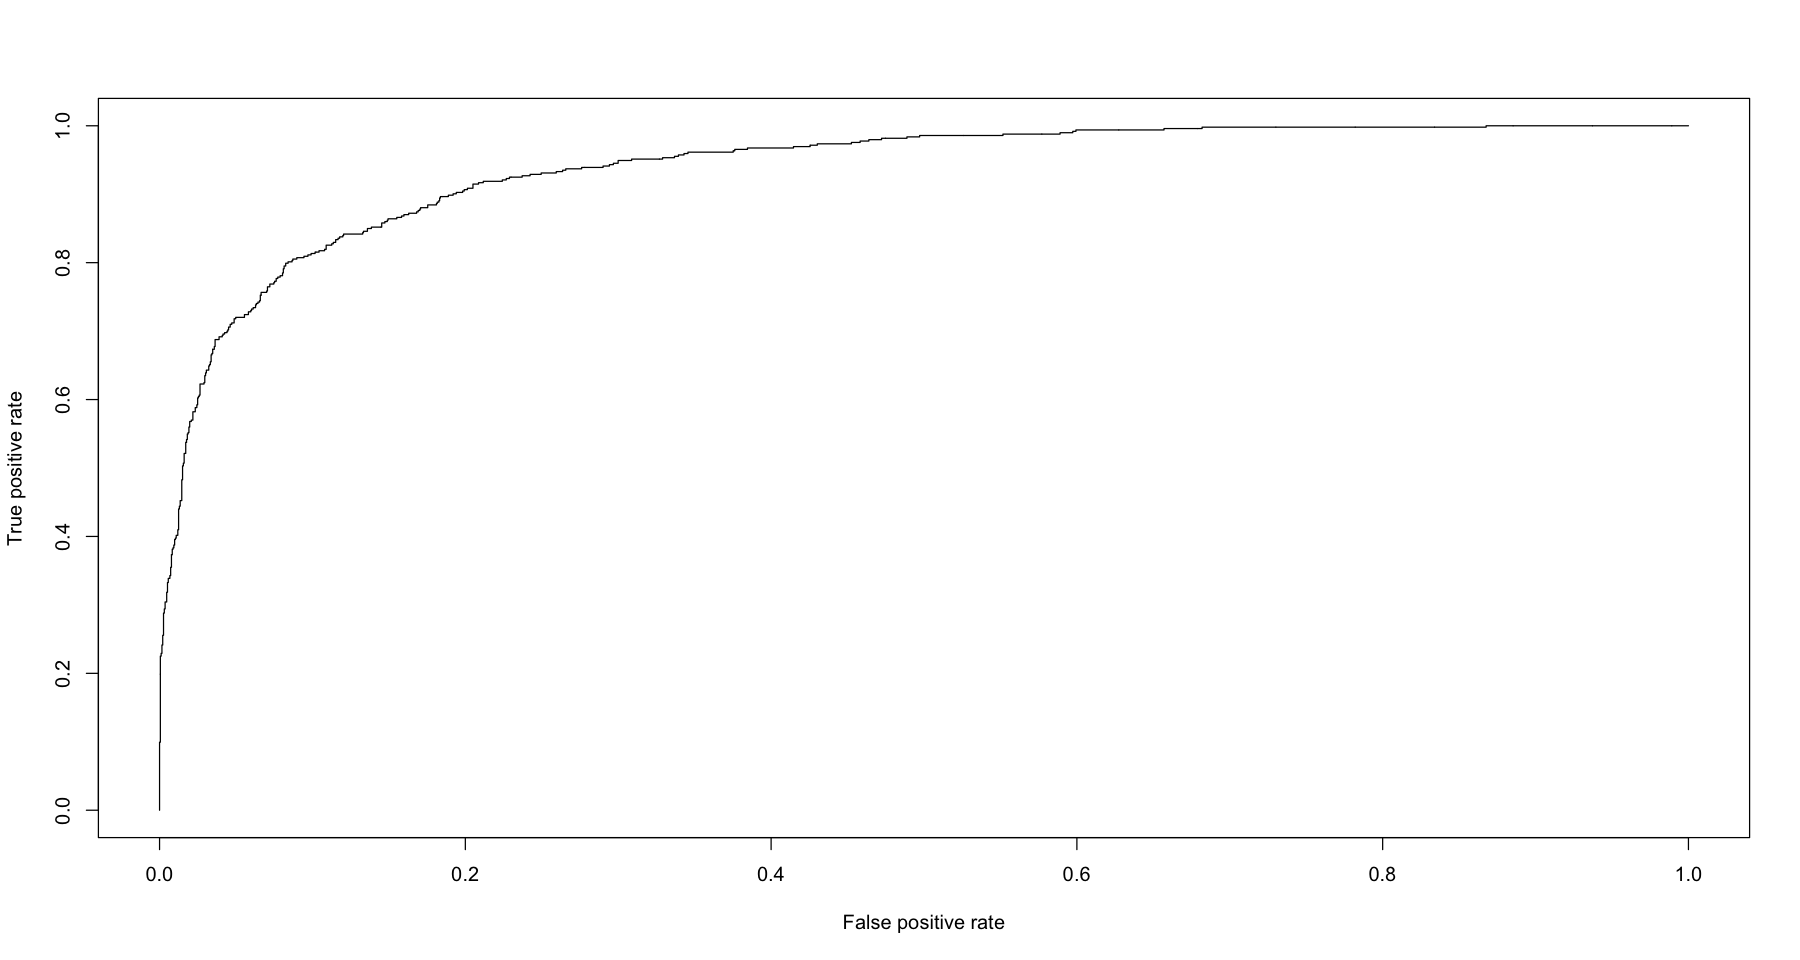

In [28]:
# Plotting ROC for the model
library(ROCR)
pred <- prediction(predicTrain, ClTrain$RainTomorrow)
perf <- performance(pred, "tpr", "fpr")
plot(perf)

From the above plot, we can infer that it is better to use a 0.6 threshold to classify the data:

In [29]:
# Setting classification treshold to 0.6
tlogmod4 <- table(ClTrain$RainTomorrow, predicTrain > 0.6)
# Calculating the accuracy of prediction on the train data
sum(diag(tlogmod4))/nrow(ClTrain)

[1] 0.9012397

In [30]:
# Calculating the accuracy of prediction on the test data
test.pred <- predict(logmod4, type = "response", newdata = ClTest)
tlogmod4t <- table(ClTest$RainTomorrow, test.pred > 0.6)
sum(diag(tlogmod4t))/nrow(ClTest)

[1] 0.9008264

In [31]:
# Calculating the Area Under Cover (AUC)
predROCR <- prediction(test.pred,ClTest$RainTomorrow)
as.numeric(performance(predROCR, "auc")@y.values)

[1] 0.9431906

**The Logistic regression model has much better accuracy than the baseline model (about 10% better), so it is a good model for predicting rain.**

## CART (Classification Tree)

In this part, I use the CART method along with Cross-Validation to predict the rain with a decision tree:

In [32]:
## Fitting CART model
numFolds <- trainControl(method = "cv", number = 10)
cpGrid <- expand.grid(.cp=seq(0.001, 0.4, 0.001))
train(RainTomorrow ~., data=ClTrain, method="rpart", trControl= numFolds, tuneGrid= cpGrid)

CART 

2420 samples
  21 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2178, 2177, 2179, 2179, 2178, 2177, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.001  0.8549999  0.53494783
  0.002  0.8566494  0.53736772
  0.003  0.8653221  0.56116921
  0.004  0.8636743  0.55006651
  0.005  0.8644836  0.54633311
  0.006  0.8665463  0.54290248
  0.007  0.8690257  0.55369337
  0.008  0.8682061  0.54733198
  0.009  0.8682061  0.54733198
  0.010  0.8673797  0.54183515
  0.011  0.8682061  0.54386442
  0.012  0.8686210  0.54641801
  0.013  0.8686210  0.54641801
  0.014  0.8686193  0.53964104
  0.015  0.8686193  0.53964104
  0.016  0.8665566  0.53536962
  0.017  0.8665566  0.53536962
  0.018  0.8665566  0.53536962
  0.019  0.8661400  0.53289666
  0.020  0.8661400  0.53289666
  0.021  0.8644836  0.52967526
  0.022  0.8636606  0.53458934
  0.023  0.8644905  0.53743160
  0.024  0.8644905  0.53

The highest accuracy for CART model is for cp = 0.032

Let's plot the tree:

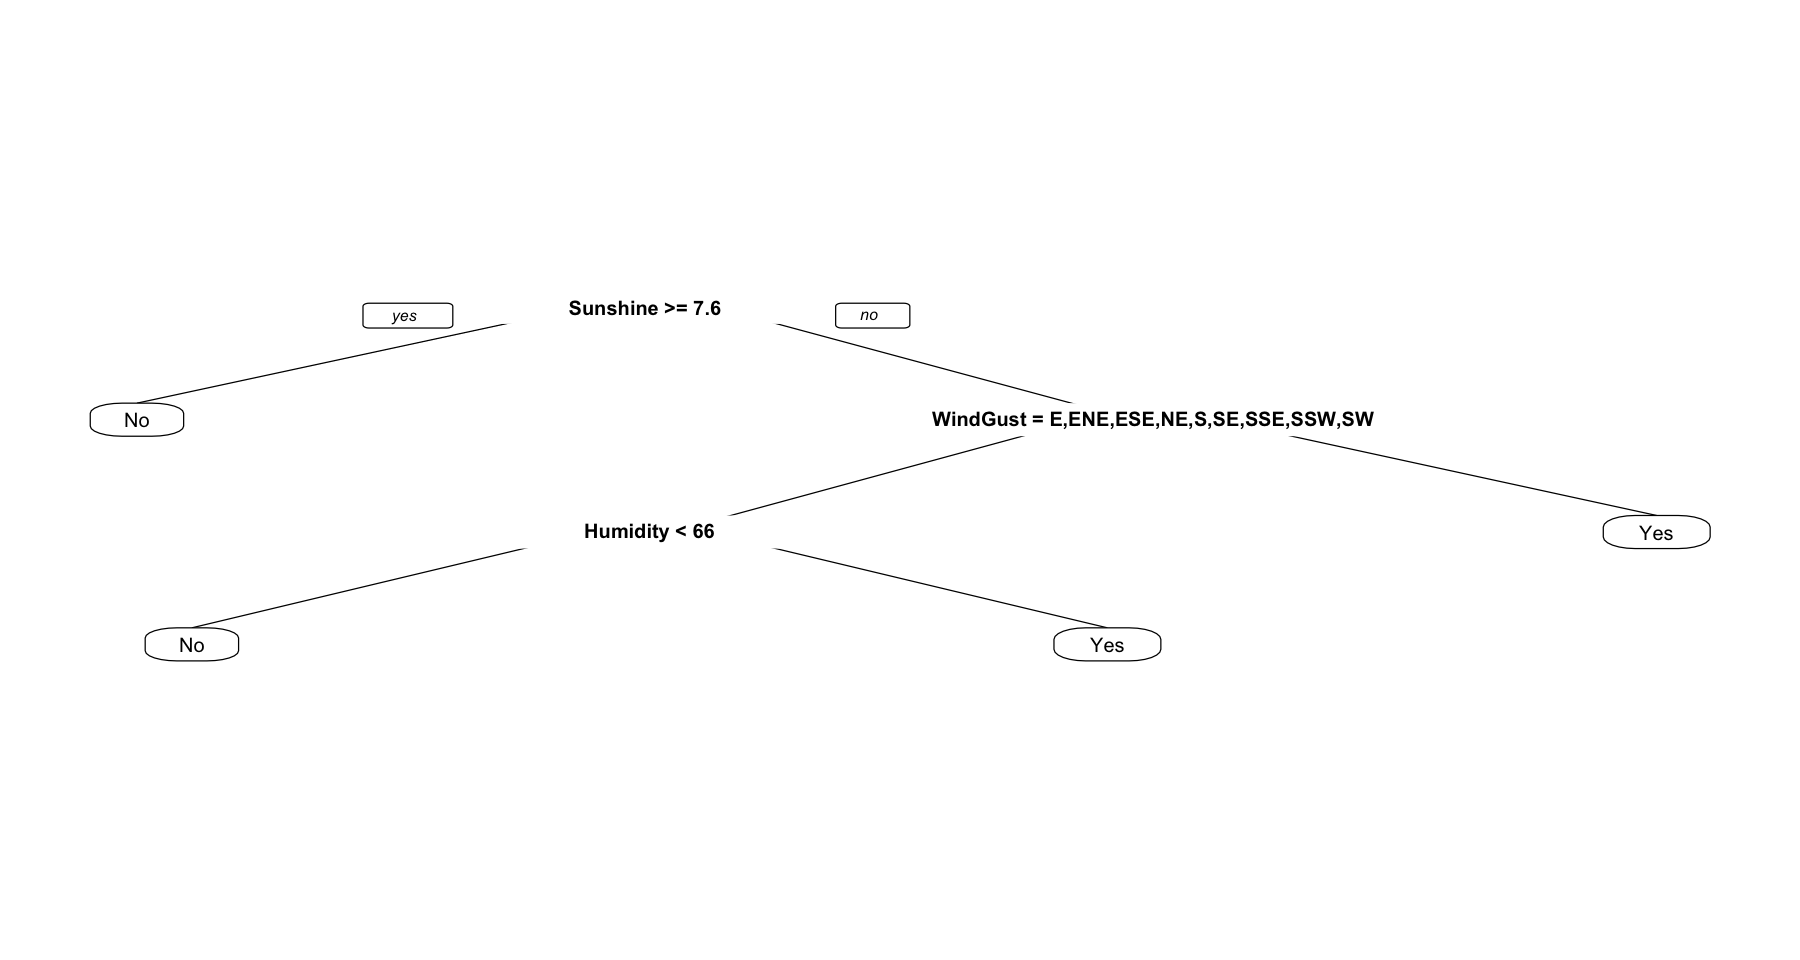

In [33]:
t.mod <- rpart(RainTomorrow ~ .-Date, data=ClTrain, method="class", cp = 0.032)
prp(t.mod)

In [34]:
# Calculating the accuracy of prediction on the test data
pred.tree <- predict(t.mod, newdata = ClTest, type="class")
cartmod  <-  table(ClTest$RainTomorrow, pred.tree)
sum(diag(cartmod))/nrow(ClTest)

[1] 0.8909091

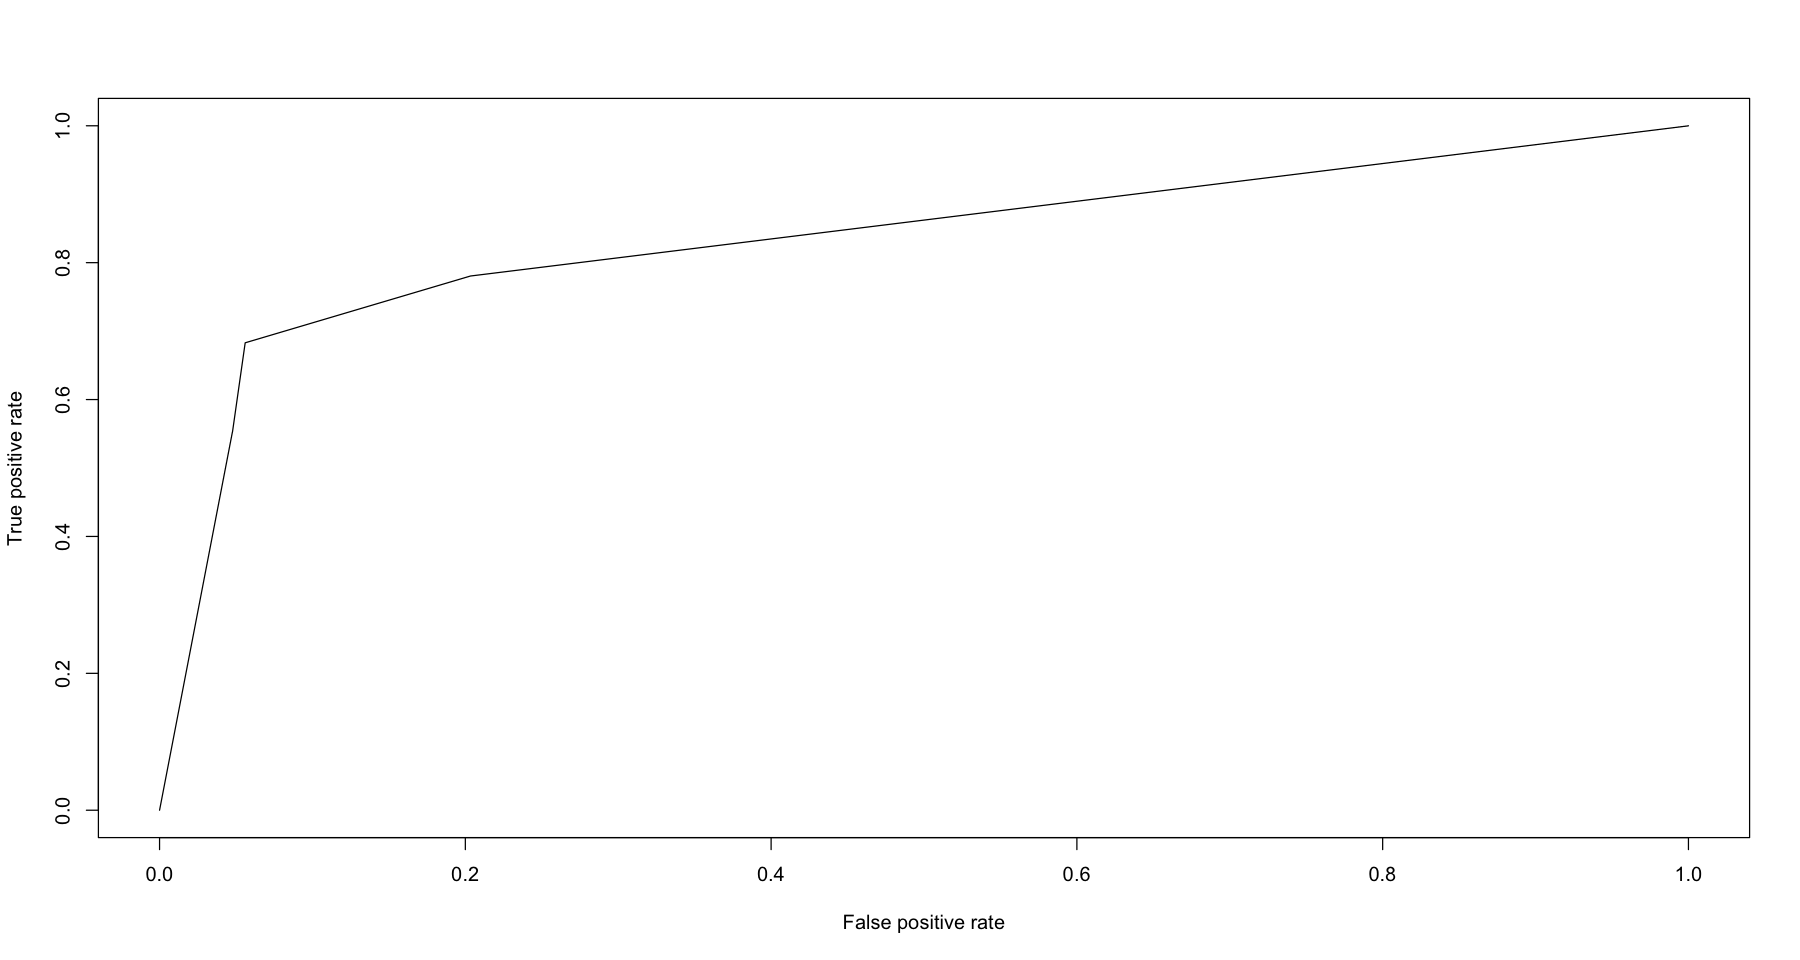

In [35]:
# Plotting ROC for the CART model
predROC <- predict(t.mod, newdata = ClTest)
pred <- prediction(predROC[,2], ClTest$RainTomorrow)
perf <- performance(pred, "tpr", "fpr")
plot(perf)

In [36]:
# Calculating the Area Under Cover (AUC) for CART model
as.numeric(performance(pred, "auc")@y.values)

[1] 0.8353406

**As you see, we got better results with the Logistic Regression model. So between the CART and LR models, we choose LR.**

## Random Forest

I use the random forest model as the last model to predict rain.

In [37]:
## Fitting RandomForest model
rf.model <- randomForest(RainTomorrow ~ .-Date , data=ClTrain, nodsize=5, ntree=500, mtry=3)
rf.model


Call:
 randomForest(formula = RainTomorrow ~ . - Date, data = ClTrain,      nodsize = 5, ntree = 500, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 9.96%
Confusion matrix:
      No Yes class.error
No  1837  90  0.04670472
Yes  151 342  0.30628803

In [38]:
# prediction
pred.rf <- predict(rf.model, newdata = ClTest)
pred.rf1 <- predict(rf.model, newdata = ClTest, type="prob")

# Calculating the accuracy of prediction on the test data
forestmod  <-  table(ClTest$RainTomorrow, pred.rf)
sum(diag(forestmod))/nrow(ClTest)

[1] 0.9157025

In [39]:
# Calculating the Area Under Cover (AUC) for Random Forest model
ROC.pred <- prediction(pred.rf1[,2], ClTest$RainTomorrow)
as.numeric(performance(ROC.pred, "auc")@y.values)

[1] 0.9477954

Comparing the random forest model to the logistic regression model, the RF model performs better. In conclusion, between CART, RF, and LR, the RF model has the highest accuracy(92%) and AUC (94%). 

# 3. Rainfall Prediction (predicting the amount of rain in a day) 

After predicting rain for the next day, I try to predict the amount of rainfall for the next day in this section. For this purpose, I will first add a column to the end of the dataset called RainfallTommorrow, and I will store the amount of rainfall of the next day in millimeters. Now this added column is intended as the target variable for prediction.

In [40]:
# Reading the dataset
weather <- read.csv('weatherAUS.csv')
# Converting the datatype of Date from chr to Date
weather$Date <- as.Date(weather$Date)

In [41]:
# dropping NA values and converting the type of chr variables to factor
weather <- na.omit(weather)
weather$RainTomorrow <- as.factor(weather$RainTomorrow)
weather$RainToday <- as.factor(weather$RainToday)
weather$Location <- as.factor(weather$Location)
weather$WindGustDir <- as.factor(weather$WindGustDir)
weather$WindDir9am <- as.factor(weather$WindDir9am)
weather$WindDir3pm <- as.factor(weather$WindDir3pm)

In [42]:
# subset data for perth
perth <- subset(weather, weather$Location == "Perth")

In [43]:
# Adding A coulumn for Rainfall tomorrow
perth$RainfallTomorrow[nrow(perth)] <- 0
for (i in 1:nrow(perth)-1) {
  perth$RainfallTomorrow[i] <- perth$Rainfall[i+1]
}

In [44]:
# Split the data into train and test sets (80% train and 20% test)
library(caTools)
set.seed(1000)
split <- sample.split(perth$RainfallTomorrow, SplitRatio = 0.8)
ClTrain <- subset(perth, split==T,select = -c(Location))
ClTest <- subset(perth, split==F,select = -c(Location))

In [45]:
# trying to fit a regression model to predict the amount of Rainfall
model1 <- lm(RainfallTomorrow ~ . -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am  - Humidity9am  - WindSpeed3pm -RainTomorrow -RainToday , data = ClTrain)
summary(model1)


Call:
lm(formula = RainfallTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Humidity9am - WindSpeed3pm - RainTomorrow - RainToday, 
    data = ClTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.187  -2.054  -0.441   1.149 100.704 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   283.089938  25.511414  11.097  < 2e-16 ***
MinTemp        -0.193160   0.034848  -5.543  3.3e-08 ***
Rainfall        0.027523   0.020453   1.346    0.179    
Evaporation    -0.052120   0.055855  -0.933    0.351    
Sunshine       -0.486423   0.050405  -9.650  < 2e-16 ***
WindGustSpeed   0.127743   0.012881   9.917  < 2e-16 ***
Humidity3pm     0.092017   0.009303   9.892  < 2e-16 ***
Pressure9am     0.988540   0.073101  13.523  < 2e-16 ***
Pressure3pm    -1.269501   0.072367 -17.543  < 2e-16 ***
Cloud3pm        0.016234   0.056777   0.286    0.775    
---
Signif. codes:  0 ‘***’ 0.00

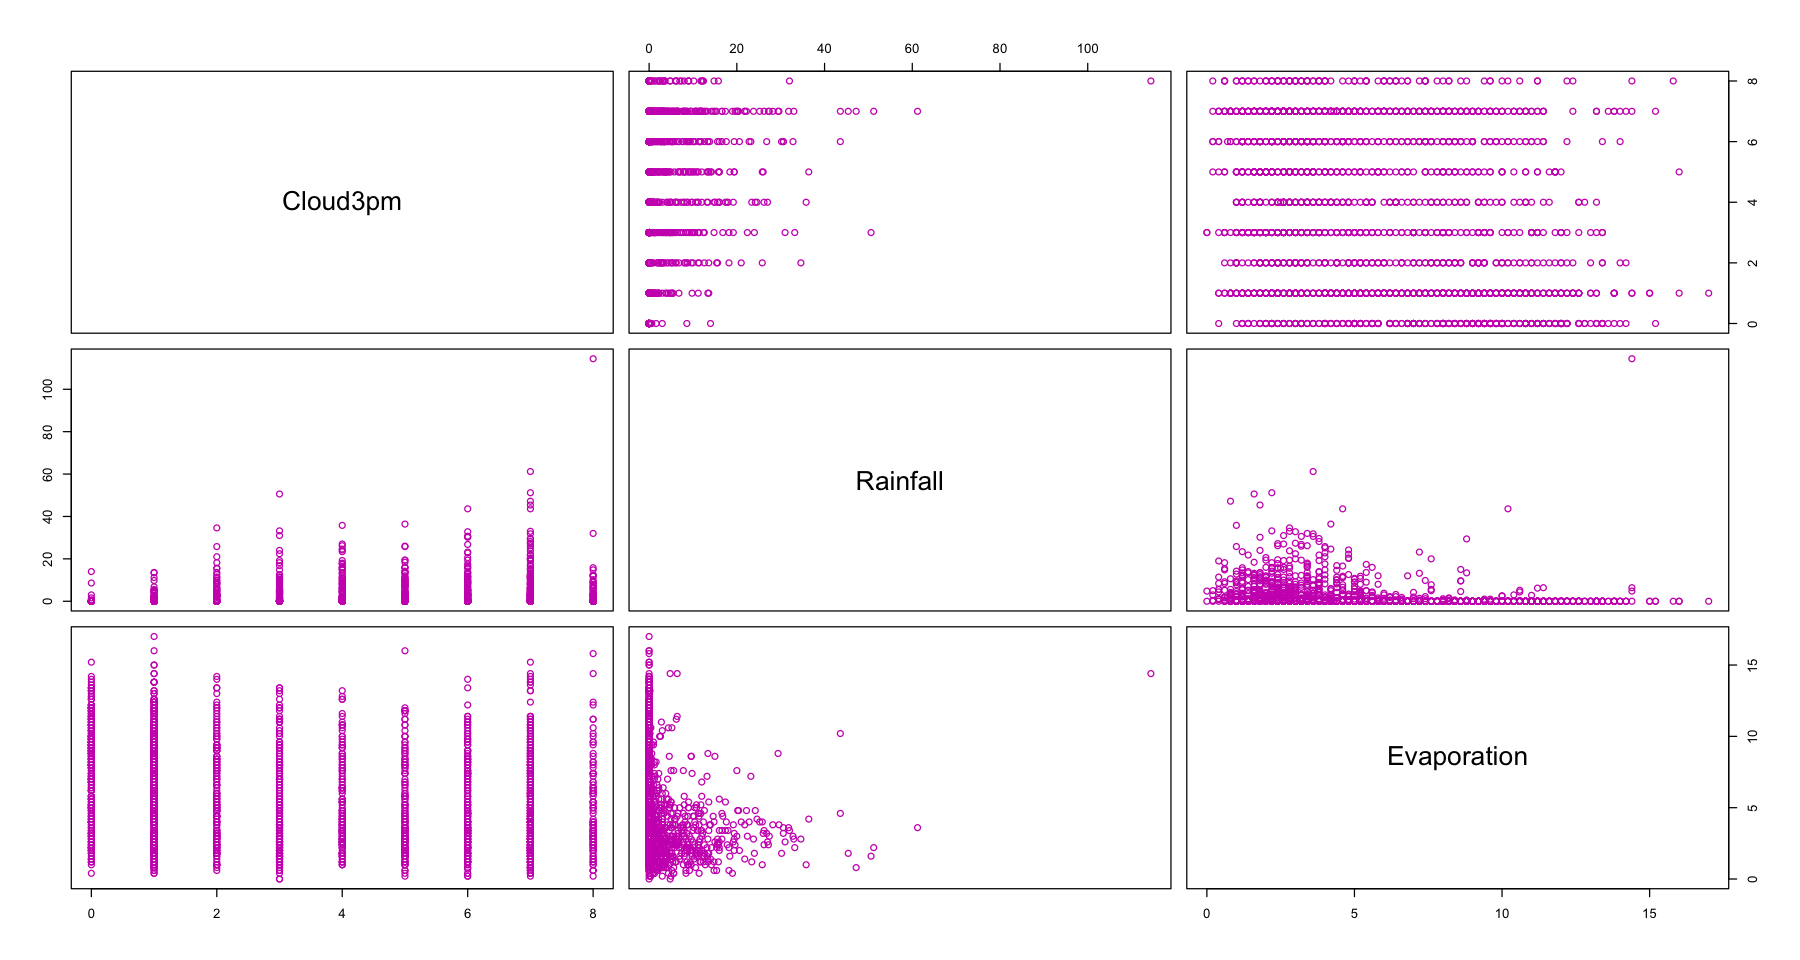

In [46]:
pairs(ClTrain[,c("Cloud3pm","Rainfall" , "Evaporation")], col = 14)

In [47]:
# Removing non-significant variables from the model
model2 <- lm(RainfallTomorrow ~ . -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am  - Humidity9am  - WindSpeed3pm -RainTomorrow -RainToday - Cloud3pm -Evaporation -Rainfall, data = ClTrain)
summary(model2)


Call:
lm(formula = RainfallTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Humidity9am - WindSpeed3pm - RainTomorrow - RainToday - 
    Cloud3pm - Evaporation - Rainfall, data = ClTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.518  -2.068  -0.435   1.141 100.221 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   285.095599  24.693570  11.545  < 2e-16 ***
MinTemp        -0.218378   0.028166  -7.753 1.31e-14 ***
Sunshine       -0.517276   0.038197 -13.543  < 2e-16 ***
WindGustSpeed   0.129438   0.012658  10.226  < 2e-16 ***
Humidity3pm     0.094778   0.008845  10.716  < 2e-16 ***
Pressure9am     0.958032   0.070343  13.619  < 2e-16 ***
Pressure3pm    -1.240678   0.070323 -17.643  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.041 on 2423 degrees of freedom
Multiple R-squared:  0.3352,	Adjusted R-s

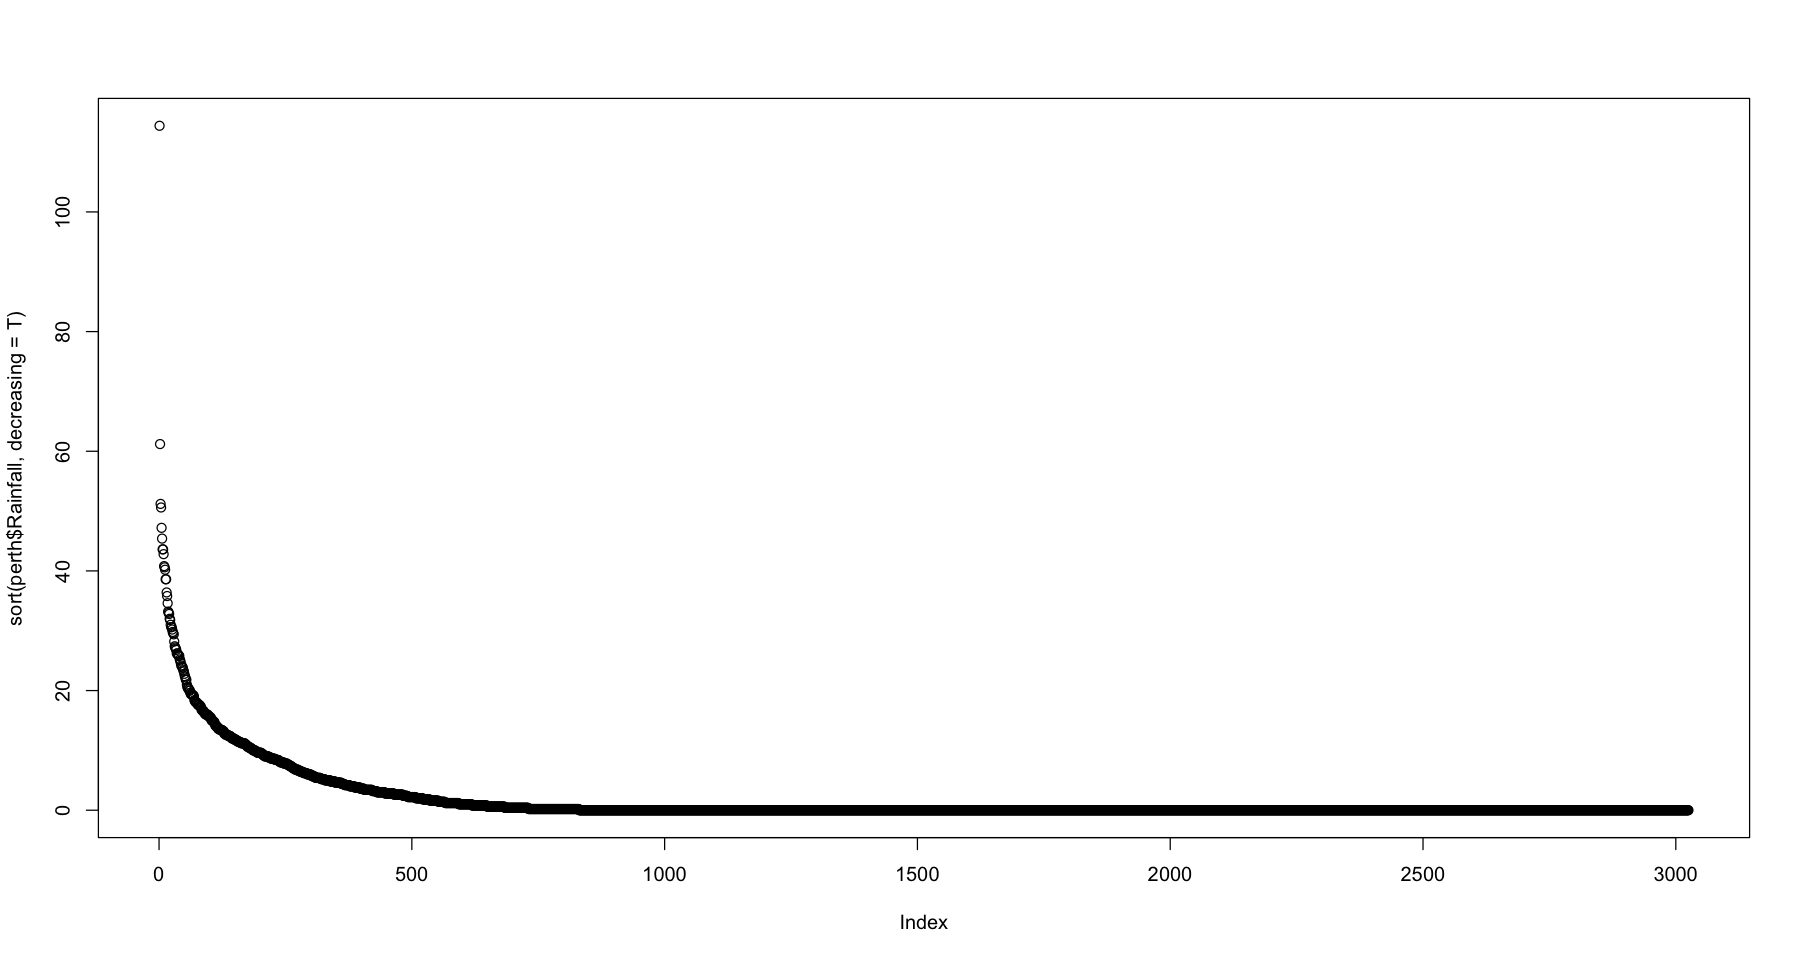

In [48]:
# Classifying the RainfallTomorrow amount
plot(sort(perth$Rainfall , decreasing = T))

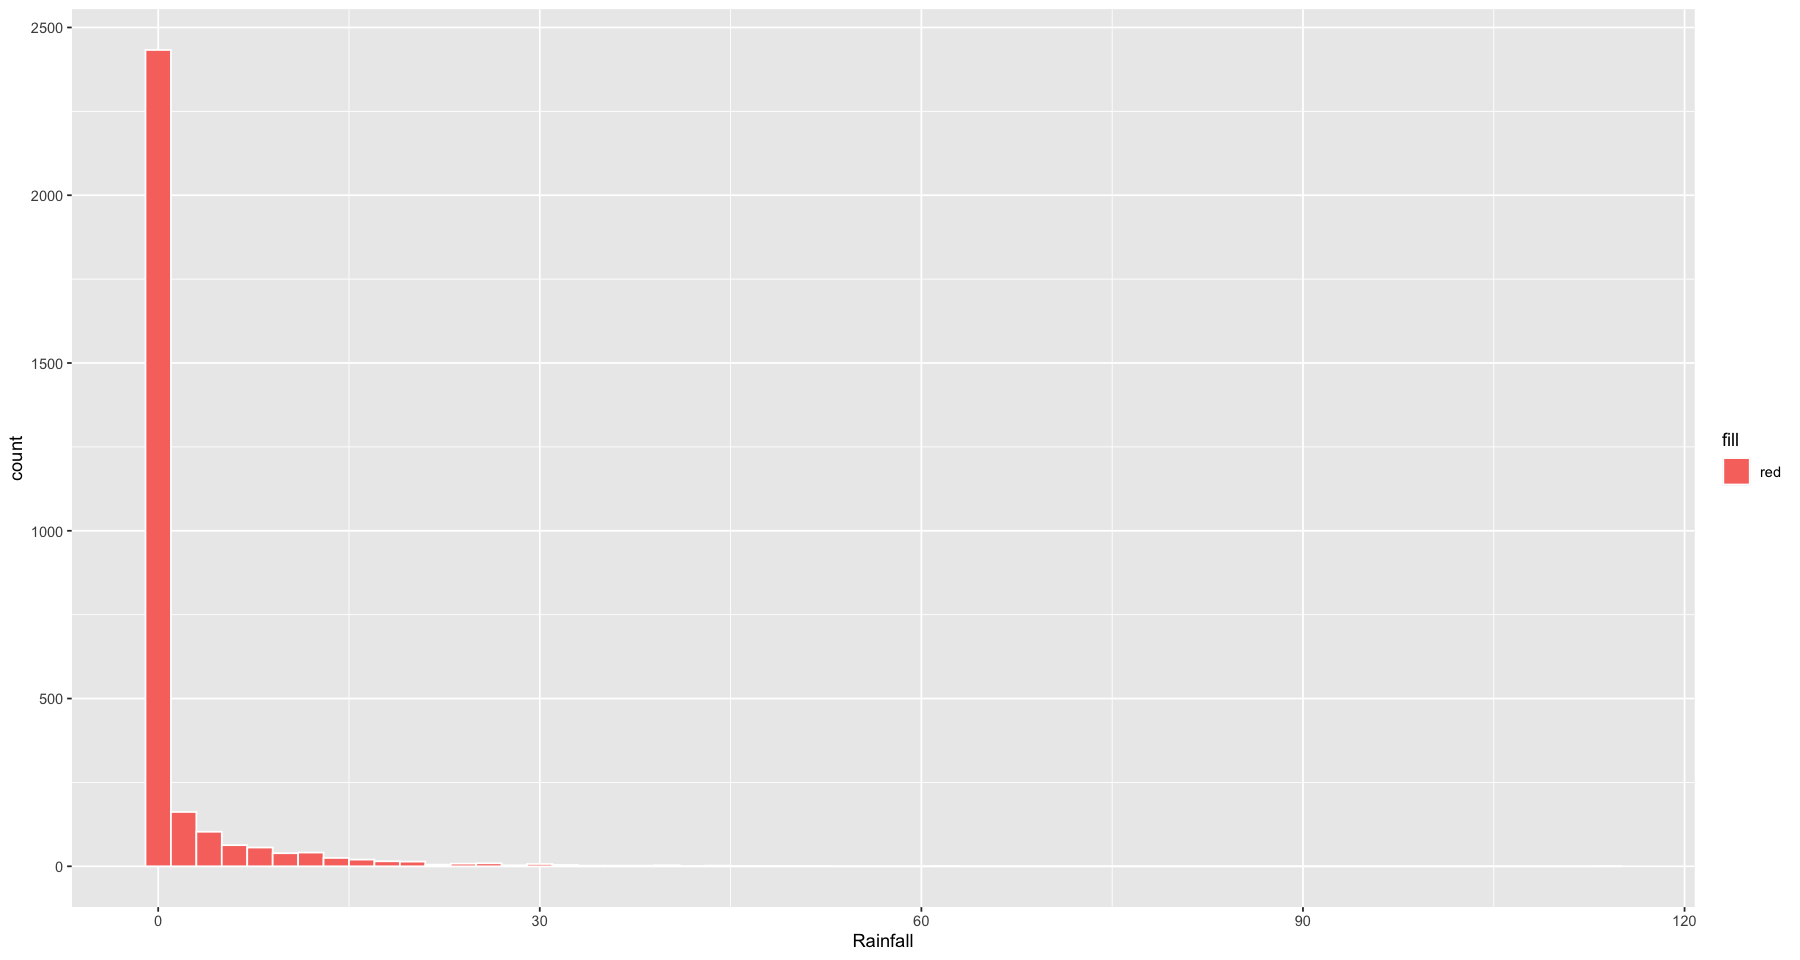

In [49]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( binwidth = 2, color= "white") 

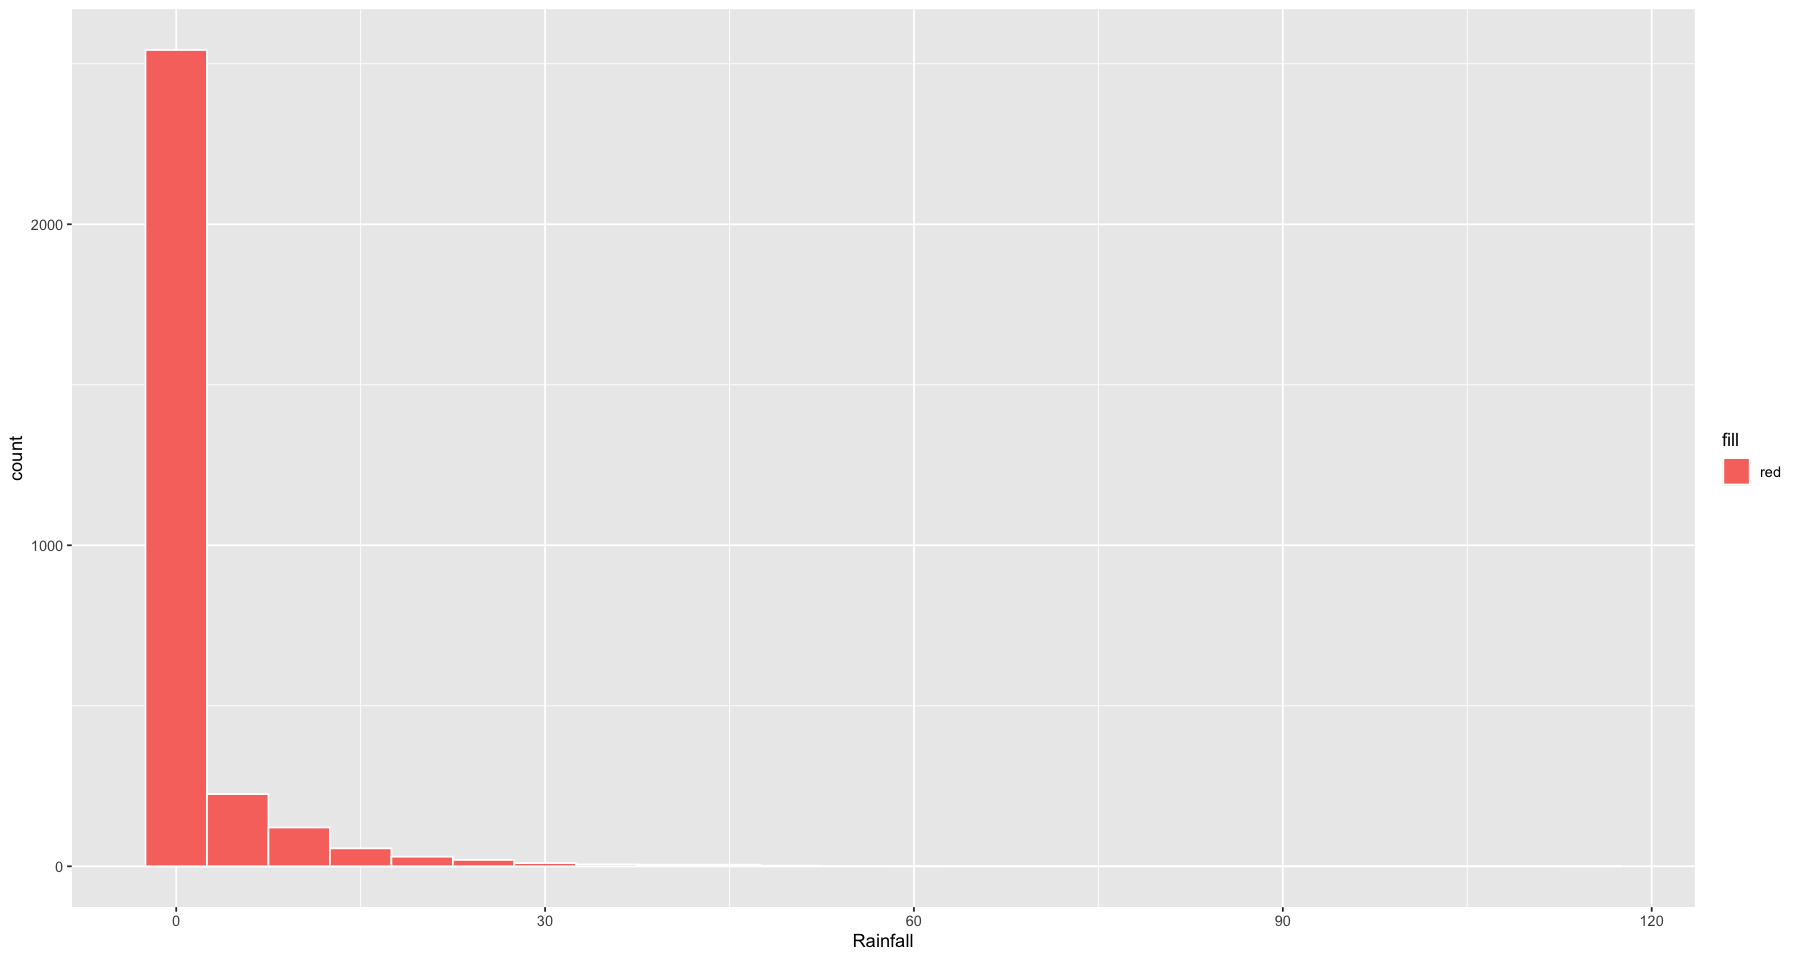

In [50]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( bins = 5 , binwidth = 5, color= "white") 

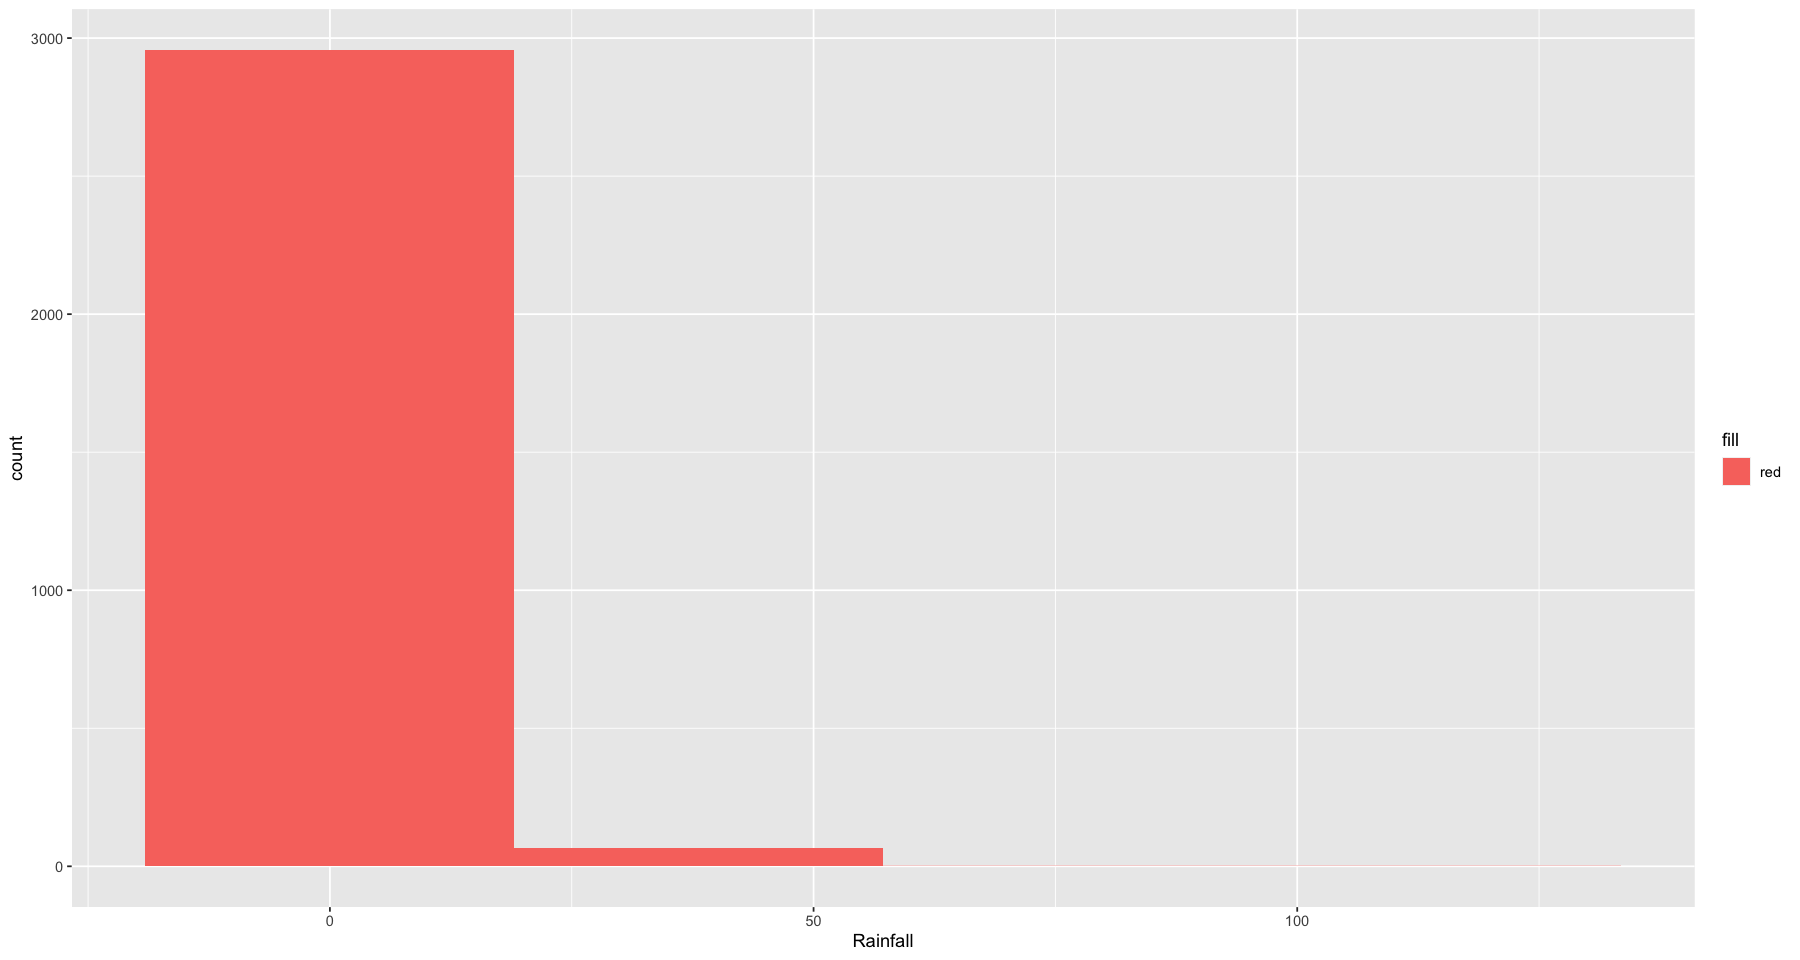

In [51]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( bins = 4) 

In [52]:
str(perth)

'data.frame':	3025 obs. of  24 variables:
 $ Date            : Date, format: "2008-07-02" "2008-07-04" ...
 $ Location        : Factor w/ 26 levels "AliceSprings",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ MinTemp         : num  6.4 9.5 9.5 0.7 0.7 3.2 11.2 13.4 7.9 5.3 ...
 $ MaxTemp         : num  20.7 19.2 16.4 15.9 18.3 20.4 20.4 17.1 17.3 18.8 ...
 $ Rainfall        : num  0 1.8 1.8 6.8 0 0 4.6 2.6 4.4 0.2 ...
 $ Evaporation     : num  1.8 1.2 1.4 2.4 0.8 1.4 2.8 2.6 2.2 1 ...
 $ Sunshine        : num  7 4.7 4.9 9.3 9.3 6.9 1.7 4.2 5.4 2.3 ...
 $ WindGustDir     : Factor w/ 16 levels "E","ENE","ESE",..: 5 14 16 6 4 7 7 13 12 4 ...
 $ WindGustSpeed   : int  22 26 44 24 37 24 46 54 19 17 ...
 $ WindDir9am      : Factor w/ 16 levels "E","ENE","ESE",..: 3 6 14 2 5 5 5 13 4 5 ...
 $ WindDir3pm      : Factor w/ 16 levels "E","ENE","ESE",..: 2 7 13 5 6 4 6 13 12 14 ...
 $ WindSpeed9am    : int  6 11 13 4 15 9 19 26 7 7 ...
 $ WindSpeed3pm    : int  9 6 17 7 13 13 11 13 9 7 ...
 $ Humidity9

In [53]:
perth$RainfallTomorrow_class[perth$RainfallTomorrow >0 & perth$RainfallTomorrow <= 1] <- "Very Low rainfall"
perth$RainfallTomorrow_class[perth$RainfallTomorrow >1 & perth$RainfallTomorrow <= 5] <- "Low rainfall"
perth$RainfallTomorrow_class[perth$RainfallTomorrow >5 & perth$RainfallTomorrow <= 15] <- "Medium rainfall"
perth$RainfallTomorrow_class[perth$RainfallTomorrow >15 ] <- "High rainfall"

In [54]:
perth$RainfallToday_class[perth$Rainfall >0 & perth$Rainfall <= 1] <- "Very Low rainfall"
perth$RainfallToday_class[perth$Rainfall >1 & perth$Rainfall <= 5] <- "Low rainfall"
perth$RainfallToday_class[perth$Rainfall >5 & perth$Rainfall <= 15] <- "Medium rainfall"
perth$RainfallToday_class[perth$Rainfall >15 ] <- "High rainfall"


In [55]:
perth <- na.omit(perth)

In [56]:
table(perth$RainfallTomorrow_class)


    High rainfall      Low rainfall   Medium rainfall Very Low rainfall 
               64               158               140               143 

In [57]:
table(perth$RainfallToday_class)



    High rainfall      Low rainfall   Medium rainfall Very Low rainfall 
               79               163               158               105 

In [58]:
str(perth)

'data.frame':	505 obs. of  26 variables:
 $ Date                  : Date, format: "2008-07-04" "2008-07-05" ...
 $ Location              : Factor w/ 26 levels "AliceSprings",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ MinTemp               : num  9.5 9.5 11.2 13.4 7.9 10.2 6.7 7.8 9 11.8 ...
 $ MaxTemp               : num  19.2 16.4 20.4 17.1 17.3 17.1 16.9 19.3 20.8 15.9 ...
 $ Rainfall              : num  1.8 1.8 4.6 2.6 4.4 24 2.6 12.6 4 5.4 ...
 $ Evaporation           : num  1.2 1.4 2.8 2.6 2.2 1.8 1.2 1.8 2 1.6 ...
 $ Sunshine              : num  4.7 4.9 1.7 4.2 5.4 6.7 3.9 9.4 1.3 2.2 ...
 $ WindGustDir           : Factor w/ 16 levels "E","ENE","ESE",..: 14 16 7 13 12 13 16 10 6 16 ...
 $ WindGustSpeed         : int  26 44 46 54 19 44 46 52 39 44 ...
 $ WindDir9am            : Factor w/ 16 levels "E","ENE","ESE",..: 6 14 5 13 4 13 5 1 5 4 ...
 $ WindDir3pm            : Factor w/ 16 levels "E","ENE","ESE",..: 7 13 6 13 12 16 7 4 14 14 ...
 $ WindSpeed9am          : int  11 13 19 26 

In [59]:
perth$RainfallTomorrow_class <- as.factor(perth$RainfallTomorrow_class)
perth$RainfallToday_class <- as.factor(perth$RainfallToday_class)



In [60]:
str(perth)

'data.frame':	505 obs. of  26 variables:
 $ Date                  : Date, format: "2008-07-04" "2008-07-05" ...
 $ Location              : Factor w/ 26 levels "AliceSprings",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ MinTemp               : num  9.5 9.5 11.2 13.4 7.9 10.2 6.7 7.8 9 11.8 ...
 $ MaxTemp               : num  19.2 16.4 20.4 17.1 17.3 17.1 16.9 19.3 20.8 15.9 ...
 $ Rainfall              : num  1.8 1.8 4.6 2.6 4.4 24 2.6 12.6 4 5.4 ...
 $ Evaporation           : num  1.2 1.4 2.8 2.6 2.2 1.8 1.2 1.8 2 1.6 ...
 $ Sunshine              : num  4.7 4.9 1.7 4.2 5.4 6.7 3.9 9.4 1.3 2.2 ...
 $ WindGustDir           : Factor w/ 16 levels "E","ENE","ESE",..: 14 16 7 13 12 13 16 10 6 16 ...
 $ WindGustSpeed         : int  26 44 46 54 19 44 46 52 39 44 ...
 $ WindDir9am            : Factor w/ 16 levels "E","ENE","ESE",..: 6 14 5 13 4 13 5 1 5 4 ...
 $ WindDir3pm            : Factor w/ 16 levels "E","ENE","ESE",..: 7 13 6 13 12 16 7 4 14 14 ...
 $ WindSpeed9am          : int  11 13 19 26 

In [61]:

## Splitting Data set into Train and Test sets
library(caTools)
set.seed(1000)
split <- sample.split(perth$RainfallTomorrow, SplitRatio = 0.8)
ClTrain <- subset(perth, split==T,select = -c(Location,RainfallTomorrow,Rainfall))
ClTest <- subset(perth, split==F,select = -c(Location,RainfallTomorrow,Rainfall))


In [62]:

## Fitting CART model

numFolds <- trainControl(method = "cv", number = 10)
cpGrid <- expand.grid(.cp=seq(0.001, 0.4, 0.001))
train(RainfallTomorrow_class ~., data=ClTrain, method="rpart", trControl= numFolds, tuneGrid= cpGrid)

CART 

412 samples
 22 predictor
  4 classes: 'High rainfall', 'Low rainfall', 'Medium rainfall', 'Very Low rainfall' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 371, 369, 371, 370, 372, 372, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.001  0.5921065  0.44395046
  0.002  0.5945455  0.44696699
  0.003  0.5945455  0.44696699
  0.004  0.5966966  0.44923026
  0.005  0.5966966  0.44923026
  0.006  0.5991966  0.45279720
  0.007  0.5991966  0.45279720
  0.008  0.5844406  0.43188622
  0.009  0.5844406  0.43188622
  0.010  0.5890917  0.43796412
  0.011  0.5890917  0.43796412
  0.012  0.5939698  0.44287981
  0.013  0.5939698  0.44287981
  0.014  0.5865973  0.43391395
  0.015  0.5865973  0.43391395
  0.016  0.5770793  0.42116587
  0.017  0.5770793  0.42060483
  0.018  0.5890476  0.43456015
  0.019  0.5820708  0.42448449
  0.020  0.5772537  0.41628977
  0.021  0.5749309  0.41228441
  0.022  0.5749309  0.41272040
  0.

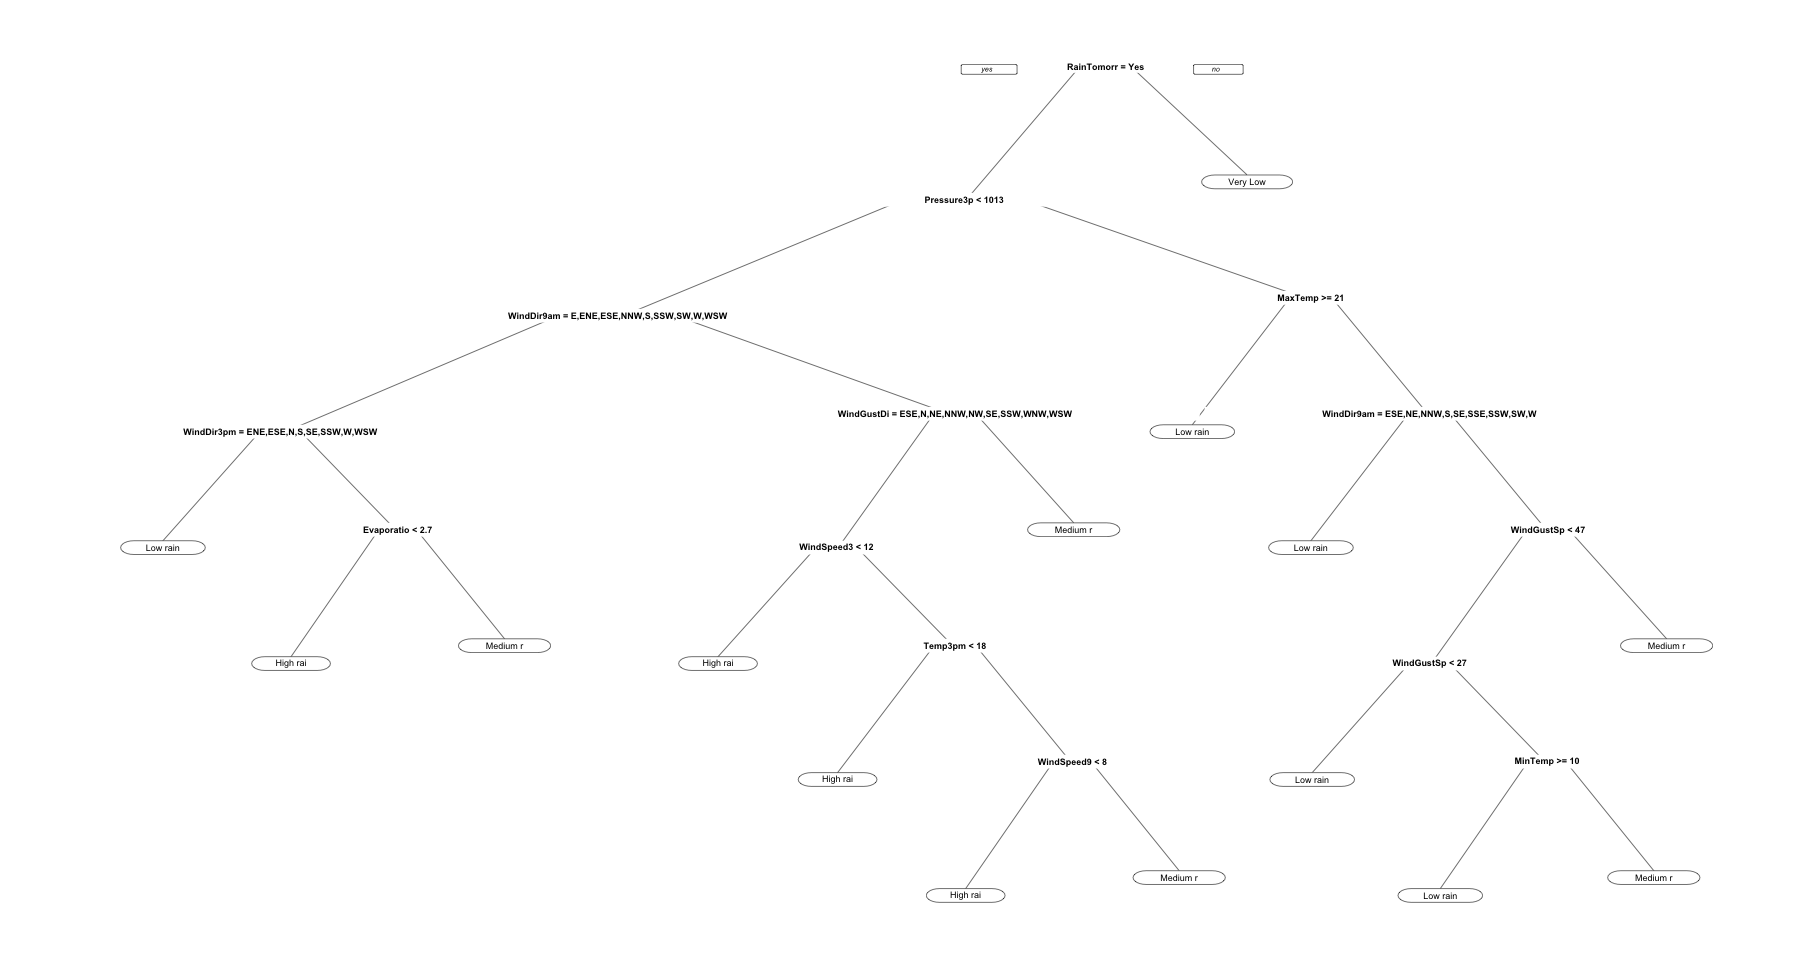

In [63]:
t.mod <- rpart(RainfallTomorrow_class ~ .-Date , data=ClTrain, method="class", cp = 0.007)
prp(t.mod)

In [64]:
pred.tree <- predict(t.mod, newdata = ClTest, type="class")
cartmod  <-  table(ClTest$RainfallTomorrow_class, pred.tree)
sum(diag(cartmod))/nrow(ClTest)


[1] 0.655914

In [65]:
## Fitting RandomForest model
rf.model <- randomForest(RainfallTomorrow_class ~ .-Date  , data=ClTrain, nodsize=5, ntree=500, mtry=3)
rf.model


Call:
 randomForest(formula = RainfallTomorrow_class ~ . - Date, data = ClTrain,      nodsize = 5, ntree = 500, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 38.83%
Confusion matrix:
                  High rainfall Low rainfall Medium rainfall Very Low rainfall
High rainfall                 8           17              36                 1
Low rainfall                  4           87              32                 3
Medium rainfall              16           45              49                 0
Very Low rainfall             1            4               1               108
                  class.error
High rainfall      0.87096774
Low rainfall       0.30952381
Medium rainfall    0.55454545
Very Low rainfall  0.05263158

In [66]:
pred.rf <- predict(rf.model, newdata = ClTest)
forestmod  <-  table(ClTest$RainTomorrow, pred.rf)
sum(diag(forestmod))/nrow(ClTest)


[1] 0.4946237